EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**  [Repo Github]: https://github.com/MaykolMedrano/AMLE


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Catalina Aránguiz`
  - `# Maykol Medrano`
- Usuario de GitHub (opcional):  `# MaykolMedrano`
`# caranguizc`

**[Repo Github]**: https://github.com/MaykolMedrano/AMLE

## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [132]:
pip install ucimlrepo

In [133]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

In [134]:
# Librerías para Manipulación y Carga de Datos
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Librerías para Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para Machine Learning

# Preprocesamiento y Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

# Métricas y Evaluación
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)

# Utilidades para Notebooks
from IPython.display import display

## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [135]:
# Cargar dataset desde UCI
bank = fetch_ucirepo(id=222)

# Separar features y target
X = bank.data.features
y = bank.data.targets

# Concatenar X e y en un único DataFrame consolidado
df = pd.concat([X, y], axis=1)

# Mostrar las primeras 5 observaciones (vista limpia)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [136]:
# Filtrar columnas tipo object o category con solo 2 valores únicos
binarias_categoricas = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if df[col].nunique() == 2
]
print("Variables binarias categóricas:", binarias_categoricas)

Variables binarias categóricas: ['default', 'housing', 'loan', 'contact', 'y']


In [137]:
# Variables cateróricas
for col in binarias_categoricas:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


In [138]:
# Tipo de dato de cada columna
df.dtypes.to_frame(name='Tipo de Dato')

# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas: Variables numéricas")
df.select_dtypes(include='number').describe()


Estadísticas descriptivas: Variables numéricas


,age,default,balance,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,0.0,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,NaN,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,NaN,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,NaN,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,NaN,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,NaN,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,NaN,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [139]:
# Estadísticas descriptivas para variables no numéricas (object/category)
print("\nEstadísticas descriptivas: Variables categóricas/object")
df.select_dtypes(exclude='number').describe()


Estadísticas descriptivas: Variables categóricas/object


,job,marital,education,month,poutcome
count,44923,45211,43354,45211,8252
unique,11,3,3,12,3
top,blue-collar,married,secondary,may,failure
freq,9732,27214,23202,13766,4901


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

<Figure size 500x400 with 0 Axes>

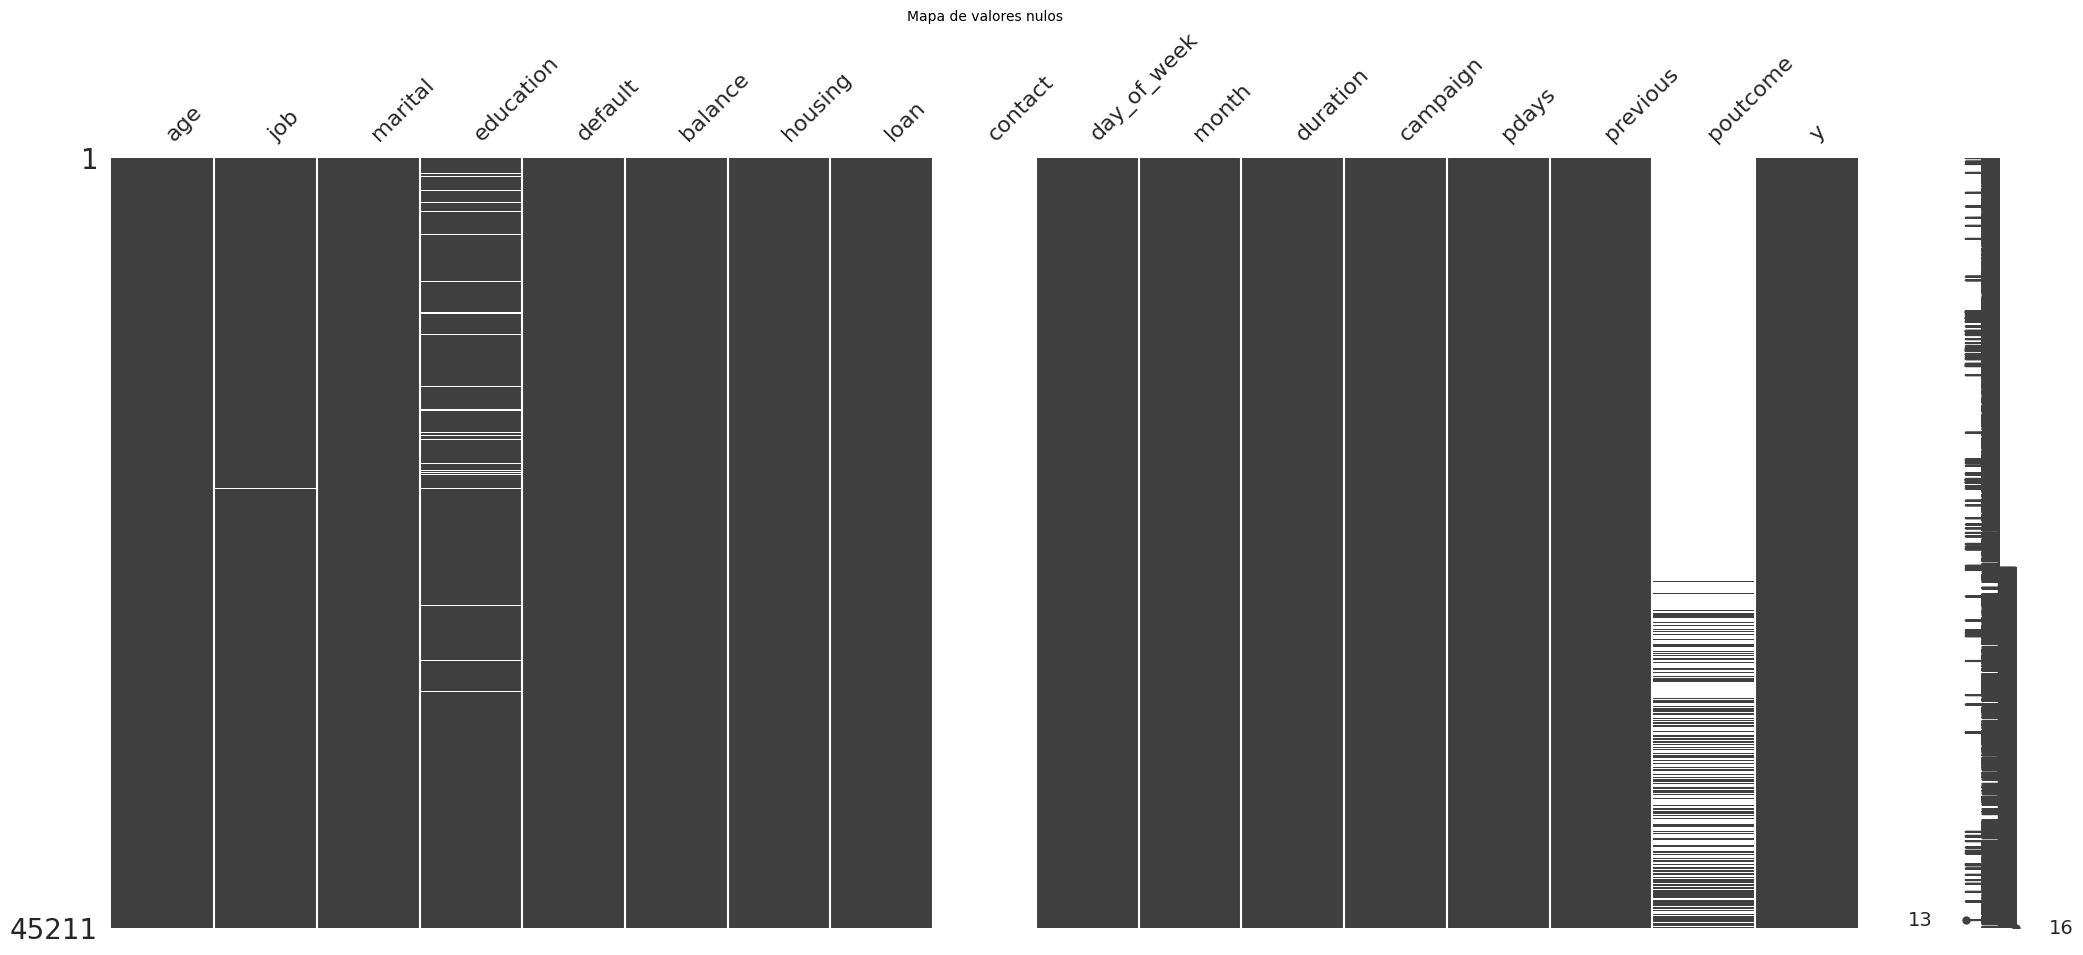

In [140]:
# Figura para el gráfico de matriz de missingno
plt.figure(figsize=(5, 4))
msno.matrix(df)
plt.title("Mapa de valores nulos", fontsize=10, color="#000000", pad=6)
plt.tight_layout()
plt.show()

In [141]:
#Identificar columnas con valores nulos (missing values)

# Creamos un DataFrame con el conteo de missing values
missing_df = df.isnull().sum().to_frame(name='Missing_Values')

# Filtramos solo aquellas columnas que tienen valores nulos
missing_df = missing_df[missing_df.Missing_Values > 0]

# Mostramos visualmente el resultado
missing_df

,Missing_Values
job,288
education,1857
contact,45211
poutcome,36959


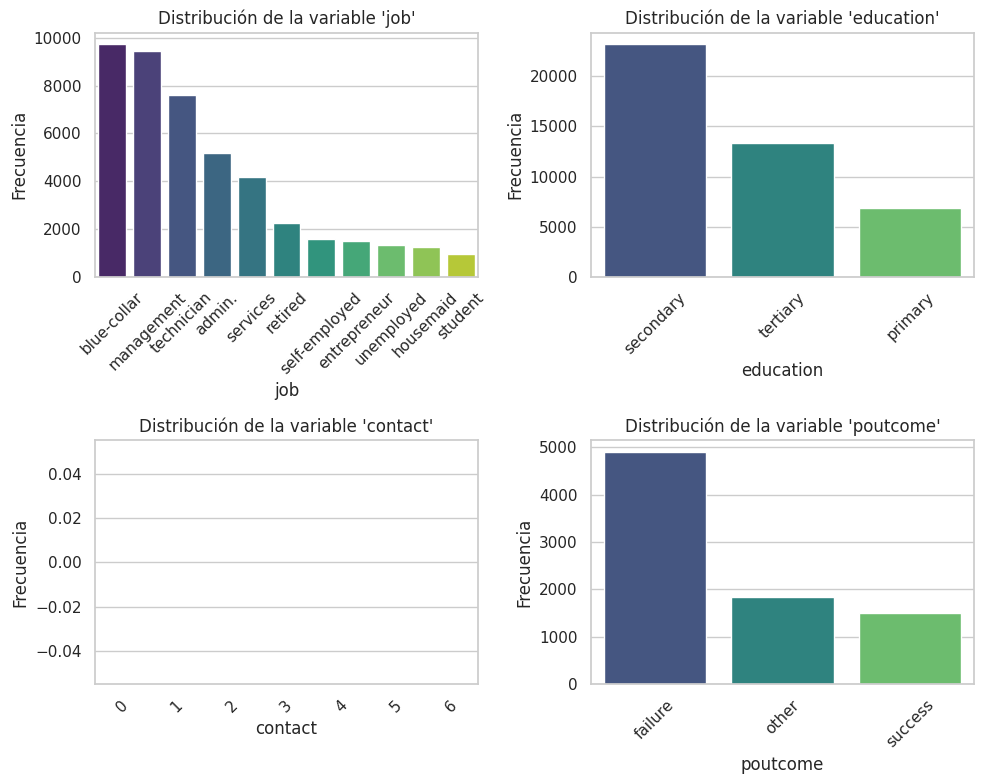

In [142]:
# Lista de variables con valores faltantes
cols = ['job', 'education', 'contact', 'poutcome']

# Ajustar el tamaño de las figuras
plt.figure(figsize=(10, 8))

# Graficar la distribución de cada variable categórica
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de la variable '{col}'")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [143]:
# Imputar valores

# job → moda
job_mode = df['job'].mode()[0]
df['job'] = df['job'].fillna(job_mode)

# education → moda
edu_mode = df['education'].mode()[0]
df['education'] = df['education'].fillna(edu_mode)

# contact → "eliminar, no hay ningun número"
# poutcome → "eliminar"
df.drop(['contact', 'poutcome'], axis=1, inplace=True)

# Verificamos que no queden missing values
df.isnull().sum().to_frame(name="Missing_Values").query("Missing_Values > 0")

,Missing_Values


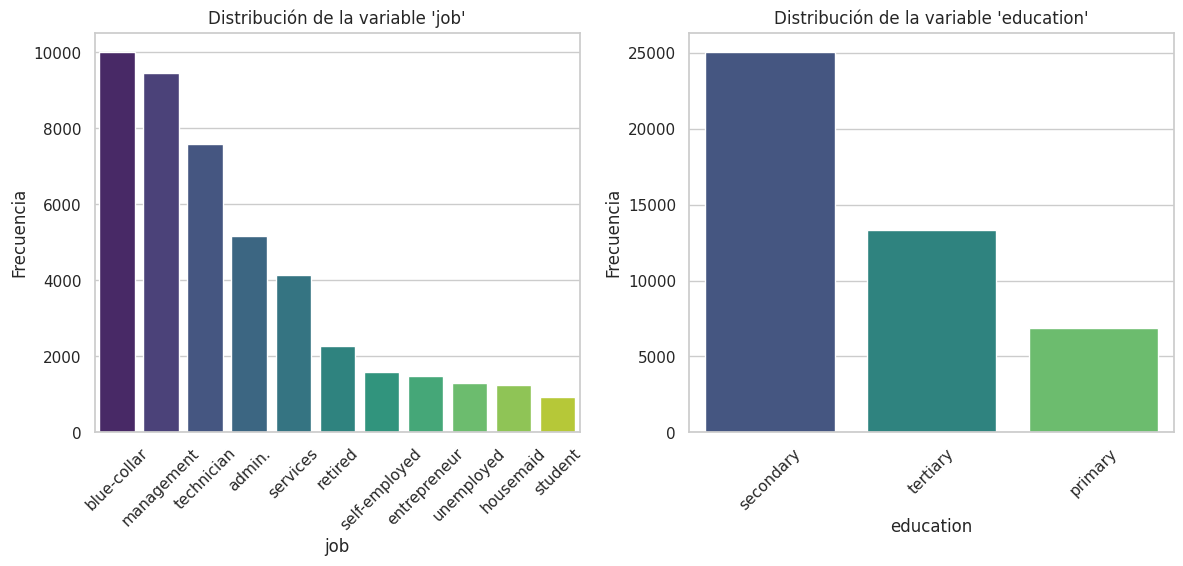

In [144]:
# Lista de variables con valores faltantes
cols = ['job', 'education']

# Ajustar el tamaño de las figuras
plt.figure(figsize=(12, 10))

# Graficar la distribución de cada variable categórica
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribución de la variable '{col}'")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


---

El análisis inicial del conjunto de datos reveló la presencia de valores faltantes en cuatro variables: job, education, contact y poutcome. La identificación se realizó mediante inspección visual con la librería missingno y un conteo sistemático de valores nulos. Esta etapa es esencial, ya que la forma en que se manejan los datos ausentes puede tener un impacto significativo sobre el rendimiento y la validez de los modelos predictivos posteriores.

En primer lugar, la variable **job** que representa el tipo de ocupación del cliente— presentó 288 valores faltantes. Esta variable es de tipo categórico nominal, es decir, sus categorías no presentan un orden natural, pero sí ofrecen información potencialmente relevante sobre la situación socioeconómica del individuo. Dado que la proporción de valores ausentes es relativamente baja y que la distribución de la variable no es uniforme, se optó por imputar los valores faltantes utilizando la moda. Esta elección se justifica en que, para variables categóricas nominales con baja proporción de datos faltantes, imputar con el valor más frecuente permite preservar la estructura general sin introducir una distorsión significativa en la distribución. Además, el hecho de que la ocupación más común sea ‘admin.’ refuerza la validez de esta estrategia, pues es razonable asumir que un grupo representativo de individuos podría compartir dicha categoría.

La variable **education** relativa al nivel educativo alcanzado por el cliente— presentó una cantidad más significativa de valores faltantes (1857). A diferencia de job, esta variable es categórica ordinal, es decir, sus categorías implican un orden lógico (por ejemplo, primary, secondary, tertiary). En este caso, aunque una imputación basada en técnicas más complejas, como árboles de decisión o modelos de regresión, podría ser considerada, se optó por una estrategia más conservadora: la imputación mediante la moda. Esta decisión se fundamenta en dos criterios. Por un lado, se busca evitar la introducción de ruido modelando con predictores que podrían estar correlacionados con la educación y, por otro, se reconoce que el valor más frecuente (secondary) ya representa una fracción significativa de la muestra. Imputar con la moda en este contexto respeta la distribución observada y minimiza el sesgo potencial sin suponer un orden implícito no observado en los datos faltantes.


El caso de la variable **contact** es estructuralmente distinto. Esta variable describe el medio de contacto utilizado para comunicarse con el cliente durante la campaña (por ejemplo, teléfono fijo o celular), y presenta una cantidad de valores faltantes equivalente a la totalidad del conjunto de datos. En términos prácticos, esto significa que la variable no aporta información útil para el análisis: carece completamente de observaciones válidas. Se decidió eliminarla del conjunto de datos, lo que se alinea con buenas prácticas en el tratamiento de variables sin información observable.

Por último, la variable **poutcome** —que describe el resultado de campañas de marketing previas para cada cliente— también exhibe una proporción sustancial de datos faltantes, con más del 80% de observaciones incompletas. Si bien su contenido puede resultar relevante desde el punto de vista predictivo (clientes expuestos a campañas exitosas podrían tener mayor probabilidad de suscribirse a un producto financiero), la magnitud del faltante hace inviable su imputación sin introducir un nivel significativo de especulación. Cualquier método imputacional, ya sea por modelos supervisados o por distribución marginal, implicaría atribuir valores a una mayoría de observaciones basados en una minoría, lo que socavaría la validez del análisis. Por esta razón, y dado que su inclusión no puede garantizar una mejora sustantiva en los modelos, se optó también por su eliminación.

El tratamiento de los valores faltantes se realizó con criterios diferenciados y ajustados a la naturaleza de cada variable. Se imputaron mediante la moda aquellas variables con proporciones de faltantes bajas y tipología categórica (job y education), mientras que se eliminaron aquellas cuya ausencia de datos era total (contact) o mayoritaria (poutcome). Esta estrategia equilibrada busca preservar la integridad informativa del dataset sin comprometer la robustez de los modelos que serán entrenados posteriormente.

---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

Columnas categóricas para graficar: ['job', 'marital', 'education', 'month']


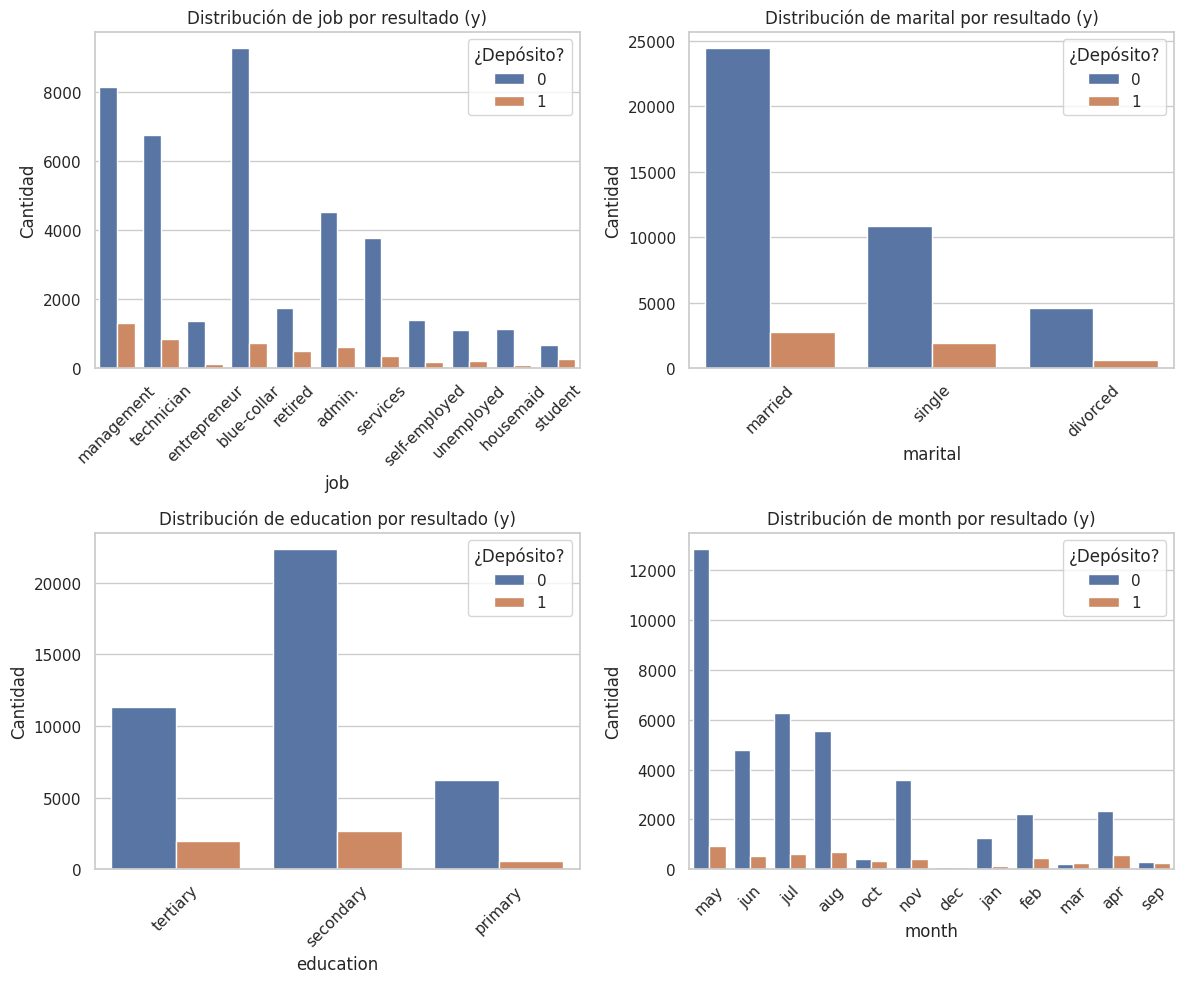

In [145]:
sns.set(style="whitegrid")
# Ajustar el tamaño de la figura para acomodar 4 subplots
plt.rcParams['figure.figsize'] = (12, 10)

# Filtrar solo las columnas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include='object').columns.tolist() # Convert to list

# Excluimos la variable objetivo 'y' si está presente
if 'y' in categorical_cols:
    categorical_cols.remove('y')

print("Columnas categóricas para graficar:", categorical_cols)

# Determinar el número de filas y columnas para la cuadrícula
n_cols = 2
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size based on number of rows and cols

# Asegurarse de que 'axes' sea un array 2D incluso si hay solo una fila o columna
if n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# Iterar a través de las columnas categóricas y los subplots
for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]

    sns.countplot(data=df, x=col, hue='y', ax=ax)
    ax.set_title(f'Distribución de {col} por resultado (y)')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col)
    ax.set_ylabel("Cantidad")
    # Ensure the legend labels match the actual values in 'y'
    ax.legend(title='¿Depósito?', labels=df['y'].unique())

# Ocultar subplots vacíos si hay alguno
for i in range(len(categorical_cols), n_rows * n_cols):
    row = i // n_cols
    col_idx = i % n_cols
    fig.delaxes(axes[row, col_idx])

plt.tight_layout()
plt.show()




---

Con base en los histogramas generados para las variables categóricas job, marital, education y month, desagregados por la variable objetivo y (indica si el cliente realizó un depósito), es posible interpretar ciertas relaciones significativas entre las categorías y la probabilidad de suscripción.

La variable **job** (tipo de empleo) se observa una fuerte heterogeneidad en la distribución de depósitos entre las distintas ocupaciones. Profesiones como management, technician y admin, concentran una mayor proporción absoluta de individuos que realizan depósitos, mientras que ocupaciones como blue-collar, services o housemaid tienen tasas visiblemente menores. Este patrón puede ser interpretado como reflejo del capital humano y nivel de ingresos asociado al tipo de empleo, lo cual influye directamente en la propensión a ahorrar mediante depósitos a plazo. Por tanto, job es una variable altamente informativa respecto de la decisión financiera del cliente y debería ser considerada fundamental en modelos predictivos.

En el caso de **maritial** (estado civil) el análisis muestra que, si bien la mayoría de los clientes están casados (married), esta categoría presenta una menor proporción de depósitos en comparación con personas solteras (single). Esta diferencia podría estar relacionada con la estructura del hogar y las restricciones presupuestarias que enfrentan los hogares casados, lo que podría limitar su capacidad de ahorro. En cambio, individuos solteros pueden tener mayor flexibilidad económica. En consecuencia, aunque la variable marital podría tener un efecto moderado, su inclusión resulta razonable por su posible interacción con otras variables sociodemográficas.

Respecto a la variable **education** (nivel educacional) se aprecia una tendencia clara a medida que aumenta el nivel educacional (de primary a tertiary), también aumenta la proporción de clientes que realizan depósitos. Esto es coherente con la literatura en economía financiera, que asocia mayor nivel educacional con un mayor grado de alfabetización financiera, mayor acceso a información y una actitud más favorable hacia el ahorro formal. Por lo tanto, education no solo es relevante desde una perspectiva estadística, sino también desde una interpretación económica fundamentada.

En cuanto a la variable **month** (mes de contacto) muestra un patrón temporal evidente. En los meses de mayo (may) y junio (jun), el volumen de contactos es significativamente más alto, pero la proporción de depósitos parece menor en comparación con meses como mar, dec o oct. Este patrón sugiere que el momento del año en que se contacta a los clientes puede incidir en su disposición a comprometer recursos en productos financieros. Es posible que factores estacionales o campañas promocionales específicas incidan sobre este comportamiento. Esta variable es particularmente útil para modelar dinámicas temporales y capturar efectos estacionales en la propensión a depositar.

Entre las variables categóricas analizadas, job y education parecen ser las más relevantes para predecir si un cliente realizará un depósito, dado que muestran patrones diferenciados claros en la distribución de la variable objetivo. La variable month, aunque no refleja una relación directa con el perfil socioeconómico del cliente, capta efectos estacionales importantes, y su inclusión puede mejorar el desempeño de modelos al capturar estas variaciones temporales. Por su parte, marital ofrece información complementaria que podría contribuir marginalmente al desempeño predictivo, especialmente en interacción con otras variables.

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

Columnas numéricas continuas a graficar: ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


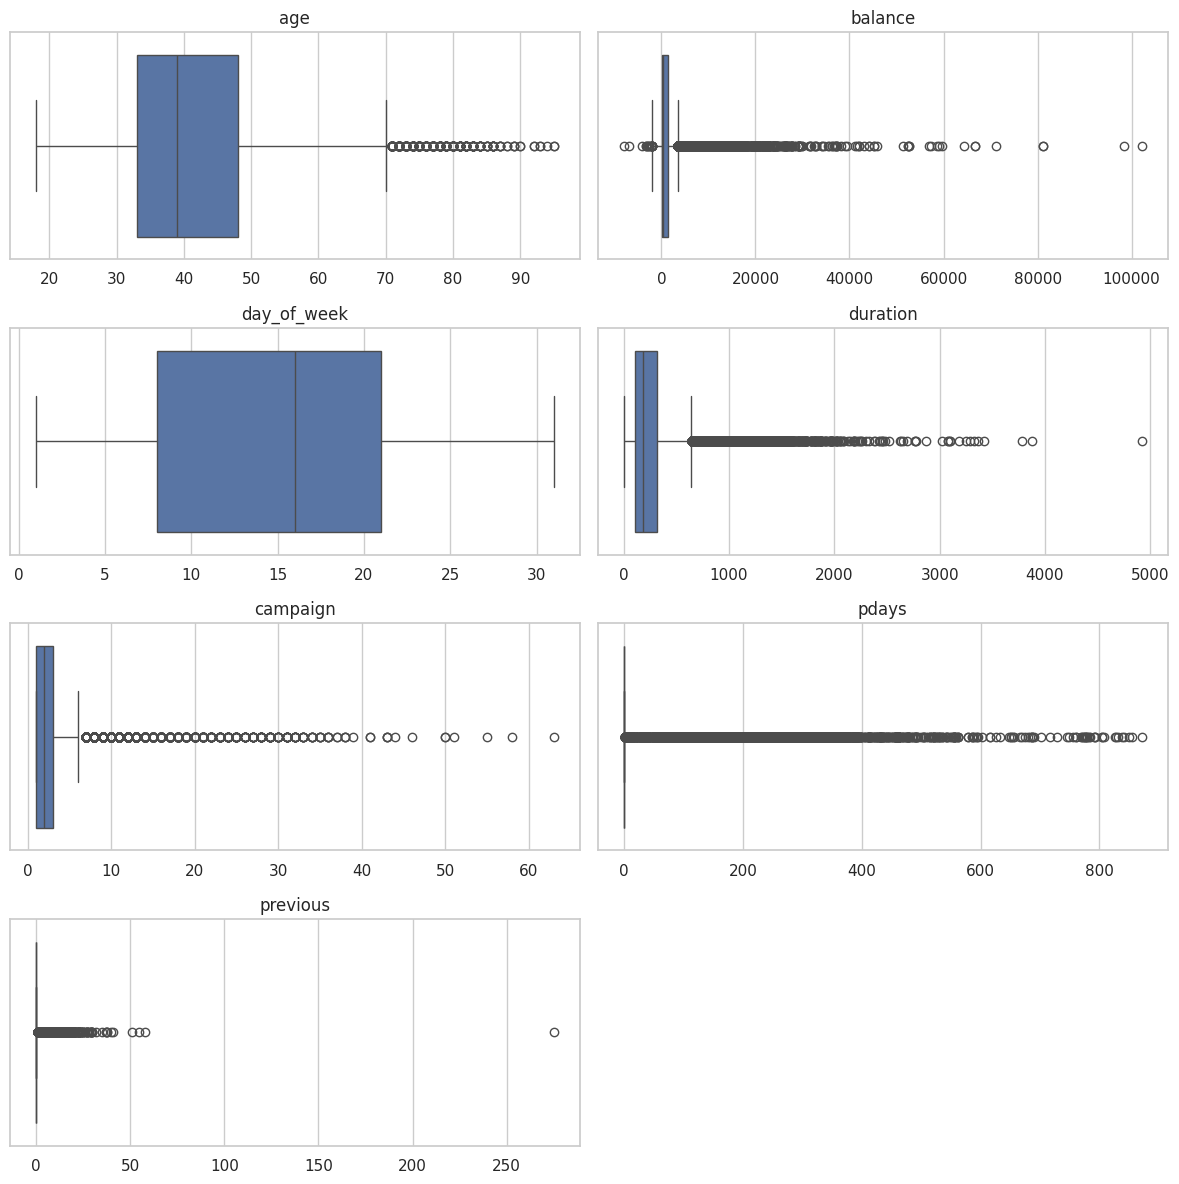

In [146]:
# Selección de variables numéricas continuas

# Selecciona todas las columnas con tipo de dato numérico ('int64' o 'float64').
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Define una lista de columnas que, aunque son numéricas, representan categorías o valores binarios (ej. 0/1).
binary_or_categorical_as_numbers = ['default', 'housing', 'loan', 'y']
# Obtiene una lista de todas las columnas numéricas.
all_num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Crea la lista final de columnas numéricas 'continuas' excluyendo las que son binarias/categóricas.
continuous_num_cols = [col for col in all_num_cols if col not in binary_or_categorical_as_numbers]

# Imprime la lista de columnas que se van a graficar para verificación.
print("Columnas numéricas continuas a graficar:", continuous_num_cols)


# Configuración de la cuadrícula de gráficos

# Define el número de columnas para la cuadrícula de gráficos.
n_cols = 2
# Calcula el número de filas necesarias para acomodar todos los gráficos, redondeando hacia arriba.
n_rows = math.ceil(len(continuous_num_cols) / n_cols)

# Crea la figura y la cuadrícula de subplots (ejes) donde se dibujarán los gráficos.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))

# Bloque de código para manejar casos especiales donde 'subplots' no devuelve un arreglo 2D.
# Esto asegura que 'axes' siempre sea un arreglo sobre el cual se pueda iterar consistentemente.
if n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# Aplana el arreglo de ejes para convertirlo de 2D a 1D, facilitando la iteración con un solo bucle.
axes = axes.flatten()


# Creación de los gráficos (Boxplots)

# Itera sobre la lista de columnas numéricas continuas para crear un gráfico para cada una.
for i, col in enumerate(continuous_num_cols):
    # Selecciona el subplot (eje) actual para dibujar.
    ax = axes[i]

    # Dibuja un gráfico de caja (boxplot) para visualizar la distribución y los outliers de la columna actual.
    sns.boxplot(data=df, x=col, ax=ax)
    # Establece el nombre de la variable como título del subplot.
    ax.set_title(f'{col}')
    # Elimina la etiqueta del eje x para una apariencia más limpia.
    ax.set_xlabel('')


# Limpieza y visualización del gráfico

# Oculta los ejes de los subplots que no se utilizaron (si el número de gráficos no es múltiplo de n_cols).
for i in range(len(continuous_num_cols), len(axes)):
    fig.delaxes(axes[i])

# Ajusta automáticamente el espaciado de los subplots para que no se superpongan.
plt.tight_layout()
# Muestra la figura final con todos los gráficos.
plt.show()


---

La variable **age** representa la edad de los clientes y se observa una distribución concentrada entre los 25 y 60 años, con una cola derecha que se extiende hacia edades mayores (hasta cerca de 95 años). Aunque algunos valores son detectados como outliers por el criterio estadístico, no deberían ser tratados como valores anómalos necesariamente, ya que es razonable que clientes de mayor edad también sean parte del universo bancario. Por tanto, estos valores se consideran válidos y no se imputan.

La variable **balance** representa el saldo promedio de los clientes en euros. Presenta una gran dispersión, con valores que alcanzan los 100,000 euros, y una mediana cercana a cero. La fuerte asimetría indica la existencia de clientes con patrimonios muy elevados, lo cual es realista y esperable en la industria financiera. Dado que estos valores reflejan diferencias socioeconómicas reales, no se recomienda su imputación, sino mantenerlos como parte de la variabilidad natural del fenómeno observado.

en cambio, **duration** si tiene muchos outliers, esta mide la duración en segundos de la última llamada telefónica que el banco hizo al cliente para ofrecerle el producto financiero, si bien esta duración esta disponible, no es una consecuencia del contacto comercial, deberiamos quitar esta variable, un buen modelo debe basarse solo en variables disponibles antes de saber el resultado, como características sociodemográficas, historial financiero, o comportamiento previo.

La variable **campaign** refleja la cantidad de contactos realizados durante la campaña en curso. Se observan valores muy altos (superiores a 50), lo que puede indicar casos de insistencia poco común por parte del banco. Estos valores extremos pueden distorsionar el entrenamiento del modelo, pues es poco probable que individuos contactados más de 50 veces representen comportamientos generales. En este caso, se justifica una imputación suave, como winsorización.

**pdays** indica los días desde el último contacto en una campaña anterior, siendo -1 el valor que representa que el cliente nunca fue contactado antes. Esta codificación implica que la variable ya tiene un valor especial para "sin contacto previo", por lo que el resto de los valores, aunque pueden parecer altos, son válidos dentro del diseño del banco. No se recomienda imputación, pero sí se sugiere transformar la variable a una categórica.

Por último la variable previous muestra la cantidad de contactos realizados en campañas anteriores. Tiene un valor extremo que podemos eliminar y luego aplicar una winsorización (suavizamiento) a los datos.

---

In [147]:
#Eliminamos un outlier muy evidente:
df = df[df['previous'] <= 250]

In [148]:
# Detección de Outliers por el Método del Rango Intercuartílico (IQR) ---

# Inicializa un diccionario vacío para almacenar el recuento de outliers por cada variable.
outlier_summary = {}

# Itera sobre cada columna numérica definida en la lista 'num_cols'.
for col in num_cols:
    # Calcula el primer cuartil (Q1 - percentil 25).
    q1 = df[col].quantile(0.25)
    # Calcula el tercer cuartil (Q3 - percentil 75).
    q3 = df[col].quantile(0.75)
    # Calcula el Rango Intercuartílico (IQR), que es la diferencia entre Q3 y Q1.
    iqr = q3 - q1

    # Define el límite inferior para la detección de outliers.
    lower = q1 - 1.5 * iqr
    # Define el límite superior para la detección de outliers.
    upper = q3 + 1.5 * iqr

    # Filtra el DataFrame para encontrar todas las filas cuyo valor en la columna actual
    # está por debajo del límite inferior o por encima del límite superior.
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    # Cuenta el número de outliers encontrados (el número de filas en el DataFrame 'outliers')
    # y lo guarda en el diccionario con el nombre de la columna como clave.
    outlier_summary[col] = len(outliers)

# Convierte el diccionario de resultados en un DataFrame de pandas para una presentación clara y ordenada.
# 'orient="index"' utiliza las claves del diccionario como el índice del DataFrame.
# 'columns' establece el nombre de la nueva columna que contiene los conteos.
pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Cantidad de outliers'])

,Cantidad de outliers
age,487
default,815
balance,4729
housing,0
loan,7244
day_of_week,0
duration,3235
campaign,3064
pdays,8256
previous,8256


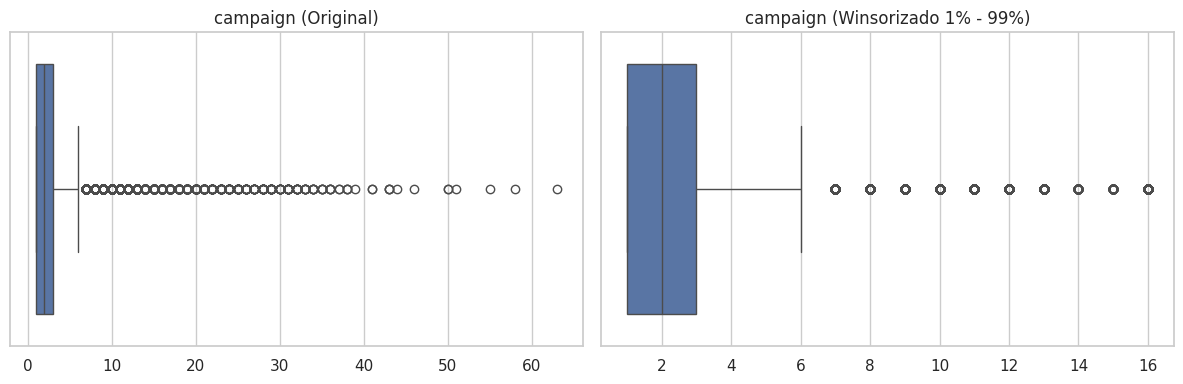

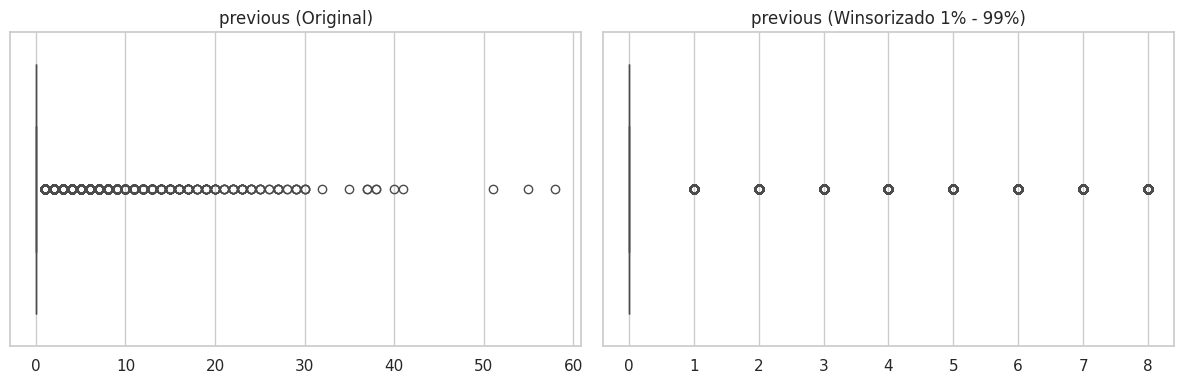

In [149]:
# Define la lista de variables que serán tratadas con winsorización y luego comparadas.
variables_para_comparar = ['campaign', 'previous']

# Definición de la Función de Winsorización

# Define una función para aplicar el tratamiento de winsorización a una columna (Serie de pandas).
def winsorize_series(series, lower_percentile=0.01, upper_percentile=0.99):
    """Aplica la técnica de winsorización a una Serie de pandas."""
    # Se asegura de que la serie sea numérica y maneja posibles valores NaN antes de calcular cuantiles.
    series = series.dropna().astype(float)
    # Si la serie está vacía después de eliminar NaNs, la devuelve con NaN para evitar errores.
    if series.empty:
        return pd.Series(np.nan, index=series.index)

    # Calcula los límites inferior y superior basados en los percentiles especificados.
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)

    # Aplica la winsorización: reemplaza los valores fuera de los límites por el valor del límite correspondiente.
    winsorized_series = series.clip(lower=lower_bound, upper=upper_bound)
    return winsorized_series

# Aplicación de la Winsorización

# Crea una copia del DataFrame original para almacenar los datos winsorizados.
# Esto es una buena práctica para no modificar el conjunto de datos original.
df_winsor = df.copy()

# Itera sobre las columnas especificadas para aplicarles la winsorización.
for col in variables_para_comparar:
    # Verifica que la columna exista en el DataFrame antes de intentar procesarla.
    if col in df_winsor.columns:
        # Llama a la función de winsorización y actualiza la columna en el nuevo DataFrame.
        df_winsor[col] = winsorize_series(df_winsor[col])
    else:
        # Imprime una advertencia si la columna especificada no se encuentra.
        print(f"Advertencia: La columna '{col}' no se encontró en el DataFrame.")

# Visualización y Comparación

# Itera nuevamente sobre cada variable para crear y mostrar los gráficos de comparación.
for col in variables_para_comparar:
    # Verifica que la columna exista en ambos DataFrames (original y winsorizado) antes de graficar.
    if col in df.columns and col in df_winsor.columns:
        # Crea una figura con dos subplots (1 fila, 2 columnas) para la comparación lado a lado.
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Subplot 1: Gráfico de la variable original
        sns.boxplot(data=df, x=col, ax=axes[0])
        axes[0].set_title(f'{col} (Original)')
        axes[0].set_xlabel('') # Elimina la etiqueta del eje x para mayor limpieza visual.

        # Subplot 2: Gráfico de la variable winsorizada
        sns.boxplot(data=df_winsor, x=col, ax=axes[1])
        axes[1].set_title(f'{col} (Winsorizado 1% - 99%)')
        axes[1].set_xlabel('') # Elimina la etiqueta del eje x.

        # Ajusta automáticamente el espaciado de los subplots para evitar superposiciones.
        plt.tight_layout()

        # Muestra la figura con la comparación.
        plt.show()
    else:
        # Si la columna no está en ambos DataFrames, imprime un mensaje y omite el gráfico.
        print(f"Omitiendo gráfico para la columna '{col}' ya que no se encuentra en ambos DataFrames.")

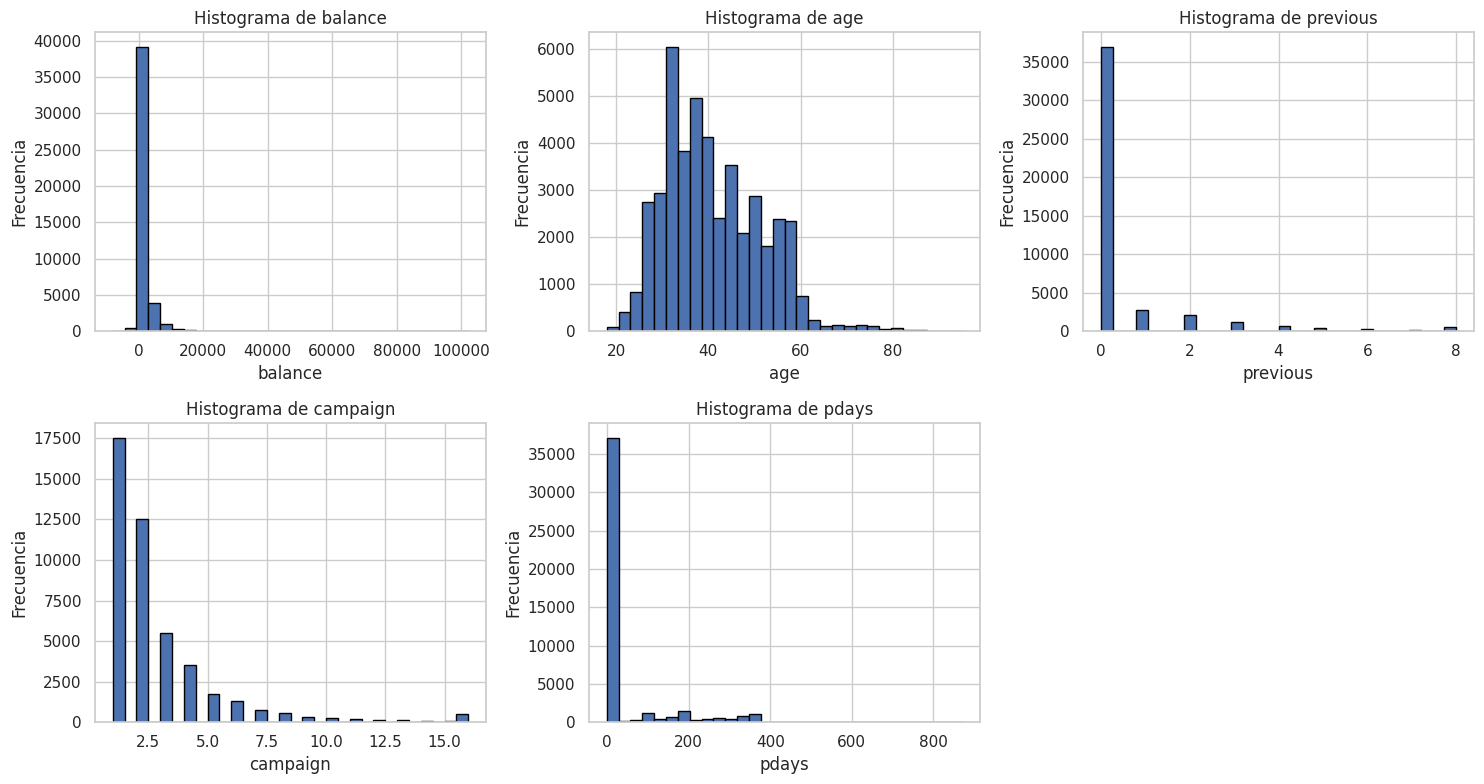

In [150]:
# Actualiza las columnas 'campaign' y 'previous' en el DataFrame principal 'df'
# con sus versiones winsorizadas (tratamiento de valores atípicos) de 'df_winsor'.
df['campaign'] = df_winsor['campaign']
df['previous'] = df_winsor['previous']

# Define la lista de variables numéricas que se van a visualizar antes de aplicar transformaciones logarítmicas.
variables_to_plot_before_transform = ['balance', 'age', 'previous', 'campaign', 'pdays']

# Configuración de la Cuadrícula de Gráficos

# Determina el número de columnas y filas para la cuadrícula de subplots.
n_cols = 3
n_rows = math.ceil(len(variables_to_plot_before_transform) / n_cols)

# Crea la figura y la cuadrícula de subplots (ejes) con un tamaño ajustado.
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Aplana el arreglo de ejes (de 2D a 1D) para poder iterar sobre él de forma más sencilla con un solo bucle.
axes = axes.flatten()

# Creación de los Histogramas

# Itera sobre la lista de variables y los ejes para crear un gráfico para cada una.
for i, var in enumerate(variables_to_plot_before_transform):
    # Verifica que la columna exista en el DataFrame para evitar errores.
    if var in df.columns:
        ax = axes[i] # Selecciona el subplot actual.

        # Prepara los datos para graficar: reemplaza valores infinitos por NaN y luego elimina los NaN.
        data_to_plot = df[var].replace([np.inf, -np.inf], np.nan).dropna()

        # Verifica si quedan datos válidos para graficar después de la limpieza.
        if not data_to_plot.empty:
            # Dibuja el histograma de la variable.
            ax.hist(data_to_plot, bins=30, edgecolor='black')
            # Configura los títulos y etiquetas del gráfico.
            ax.set_title(f'Histograma de {var}')
            ax.set_xlabel(var)
            ax.set_ylabel('Frecuencia')
            ax.grid(True)
        else:
            # Si no hay datos válidos, muestra un mensaje en el subplot.
            ax.set_title(f'No hay datos para {var}')
            ax.text(0.5, 0.5, 'No hay datos válidos', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Limpieza Final del Gráfico

# Oculta los subplots que no se utilizaron (si el número de gráficos no es un múltiplo de n_cols).
for i in range(len(variables_to_plot_before_transform), len(axes)):
    fig.delaxes(axes[i])

# Ajusta automáticamente el espaciado entre subplots para evitar que los títulos y etiquetas se superpongan.
plt.tight_layout()
# Muestra la figura con todos los gráficos generados.
plt.show()

In [151]:
# Selección de variables finales

# Crea un nuevo DataFrame 'df_vf' seleccionando solo las columnas de interés del DataFrame original 'df'.
# Este paso consolida el conjunto de datos que se usará para el modelado.
df_vf = df[[
    'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
    'month', # Se mantiene 'month' ya que fue tratada y es relevante.
    'balance', 'campaign', 'previous', 'pdays', 'y'
]]
# Nota: Las columnas 'contact' y 'poutcome' fueron excluidas previamente por exceso de datos faltantes.

# Ajuste de la Variable 'pdays'
# Recodifica la columna 'pdays': el valor -1, que originalmente indica que un cliente no fue contactado
# previamente, se reemplaza por 0. Esto unifica el tratamiento de la variable como numérica.
df_vf['pdays'] = df_vf['pdays'].replace(-1, 0)

# Verificación de los datos
# Muestra una muestra aleatoria de 10 filas del DataFrame 'df_vf'
# para inspeccionar visualmente los datos y verificar que los cambios se aplicaron correctamente.
df_vf.sample(10)

,age,job,marital,education,default,housing,loan,month,balance,campaign,previous,pdays,y
37755,37,technician,divorced,secondary,0,1,0,may,5957,3.0,2.0,177,0
499,37,technician,single,secondary,0,1,0,may,17,1.0,0.0,0,0
20427,37,management,married,secondary,0,0,0,aug,0,2.0,0.0,0,0
15828,30,management,married,tertiary,0,1,0,jul,74,3.0,0.0,0,0
870,33,services,divorced,secondary,0,1,0,may,327,1.0,0.0,0,0
31852,23,admin.,single,tertiary,0,0,1,apr,314,4.0,0.0,0,1
38419,28,student,single,secondary,0,1,0,may,217,2.0,1.0,372,0
18086,42,blue-collar,married,secondary,0,0,0,jul,2374,2.0,0.0,0,0
15785,34,entrepreneur,married,primary,0,1,0,jul,0,3.0,0.0,0,0
2811,46,blue-collar,single,secondary,0,1,0,may,2401,2.0,0.0,0,0


***
Se identificaron los outliers de las variables numéricas continuas mediante el criterio del rango intercuartílico (IQR). Se visualizaron estos valores con diagramas de caja y se cuantificaron los outliers por variable. A partir de este diagnóstico, se tomaron decisiones diferenciadas: se eliminó un valor extremo en previous (mayor a 250) y se aplicó winsorización entre los percentiles 1% y 99% a las variables campaign y previous, dado su alto sesgo y presencia de valores atípicos que podrían distorsionar el modelo. Finalmente, se descartó la variable duration por representar una fuga de información (data leakage), ya que refleja un resultado posterior al proceso de decisión del cliente. El resto de las variables se conservaron sin imputación, pues sus valores extremos eran coherentes con la naturaleza del fenómeno.
***


## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas No Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [152]:
# Revisar todas las columnas y sus tipos
df_vf.dtypes.to_frame(name="Tipo de dato")

,Tipo de dato
age,int64
job,object
marital,object
education,object
default,int64
housing,int64
loan,int64
month,object
balance,int64
campaign,float64


In [153]:
# Definición de grupos de variables

# Define una lista con los nombres de las columnas numéricas.
# Estas variables ya fueron transformadas en pasos previos (ej. logaritmos, winsorize).
numerical_cols = [
    'age', 'balance',
    'pdays', 'campaign', 'previous'
]

# Define una lista con las columnas categóricas sin un orden natural (nominales).
categorical_cols = [
    'job', 'marital', 'default', 'housing',
    'loan'
]

# Define una lista con las columnas categóricas que tienen un orden lógico (ordinales).
ordinal_cols = ['month', 'education']

# Especifica el orden jerárquico explícito para cada variable ordinal.
month_order = [['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']]
education_order = [['unknown', 'primary', 'secondary', 'tertiary']]

# Separación de datos y limpieza

# Define la variable objetivo 'y'.
y = df_vf['y']

# Define las características (features) 'X' como el DataFrame completo sin la variable objetivo.
X = df_vf.drop(columns=['y'])

# Limpia los datos: reemplaza valores infinitos (inf) por NaN y luego elimina todas las filas que contengan NaN.
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
# Asegura que 'y' contenga las mismas filas que 'X' después de la limpieza, usando el índice.
y_clean = y.loc[X_clean.index]


# Definición de pipelines de preprocesamiento

# Define el pipeline para las variables numéricas.
numeric_pipeline = Pipeline([
    ('scaler', StandardScaler()) # Estandariza los datos (media 0, desviación estándar 1).
])

# Define el pipeline para las variables categóricas nominales.
categorical_pipeline = Pipeline([
    # Convierte cada categoría en una nueva columna binaria (0s y 1s).
    # 'handle_unknown="ignore"' evita errores si aparecen categorías nuevas en datos futuros (crea columnas de ceros).
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define el pipeline para las variables categóricas ordinales.
ordinal_pipeline = Pipeline([
    # Convierte las categorías a números según el orden especificado.
    # 'handle_unknown' asigna un valor (-1) a categorías no vistas durante el entrenamiento.
    ('ordinal', OrdinalEncoder(categories=month_order + education_order, handle_unknown='use_encoded_value', unknown_value=-1)),
    # Escala los valores resultantes a un rango entre 0 y 1.
    ('minmax', MinMaxScaler())
])

# Creación y aplicación del preprocesador principal

# Define el preprocesador que une todos los pipelines anteriores.
# ColumnTransformer aplica un transformador específico a un conjunto de columnas.
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),     # Aplica 'numeric_pipeline' a las columnas numéricas.
    ('cat', categorical_pipeline, categorical_cols), # Aplica 'categorical_pipeline' a las columnas nominales.
    ('ord', ordinal_pipeline, ordinal_cols)         # Aplica 'ordinal_pipeline' a las columnas ordinales.
    # Las columnas no listadas aquí serán eliminadas del resultado final.
])

# Aplica el preprocesador al conjunto de datos limpio.
# 'fit_transform' aprende los parámetros de los transformadores (media, categorías, etc.) y transforma los datos.
X_processed = preprocessor.fit_transform(X_clean)

# Imprime las dimensiones (filas, columnas) de los DataFrames para verificar el proceso.
print("Shape original:", X.shape)
print("Shape limpio:", X_clean.shape)
print("Shape procesado:", X_processed.shape)

# Re-alinea 'y_clean' para asegurar la correspondencia de índices con el DataFrame procesado.
y_clean = y.loc[X_clean.index]

# Creación del DataFrame final procesado

# Extrae los nombres de las nuevas columnas generadas por el preprocesador (ej. de OneHotEncoder).
final_column_names = preprocessor.get_feature_names_out()

# Crea el DataFrame final con los datos ya procesados, los nuevos nombres de columna y el índice original.
X_processed_df = pd.DataFrame(X_processed, index=X_clean.index, columns=final_column_names)

# Muestra las primeras 20 filas del DataFrame procesado para inspeccionar el resultado final.
X_processed_df.head(20)

Shape original: (45210, 12)
Shape limpio: (45210, 12)
Shape procesado: (45210, 27)


,num__age,num__balance,num__pdays,num__campaign,num__previous,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,...,cat__marital_married,cat__marital_single,cat__default_0,cat__default_1,cat__housing_0,cat__housing_1,cat__loan_0,cat__loan_1,ord__month,ord__education
0,1.606945,0.256411,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,1.0
1,0.288524,-0.437896,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.5
2,-0.747378,-0.446764,-0.410978,-0.654133,-0.366264,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.363636,0.5
3,0.571043,0.047199,-0.410978,-0.654133,-0.366264,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.5
4,-0.747378,-0.447092,-0.410978,-0.654133,-0.366264,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.363636,0.5
5,-0.559032,-0.371553,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,1.0
6,-1.218243,-0.300611,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.363636,1.0
7,0.100178,-0.446764,-0.410978,-0.654133,-0.366264,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.363636,1.0
8,1.606945,-0.407680,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.0
9,0.194351,-0.252660,-0.410978,-0.654133,-0.366264,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.5


In [154]:
#Cuantas columnas nuevas hay?
original_cols_count = X_clean.shape[1]
processed_cols_count = X_processed.shape[1]
original_relevant_cols_count = len(numerical_cols) + len(categorical_cols) + len(ordinal_cols)
nuevas_columnas = processed_cols_count - X_clean.shape[1]

print("Nuevas columnas generadas (net change):", nuevas_columnas)
print("Distribución en y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en y_test:")
print(y_test.value_counts(normalize=True))

Nuevas columnas generadas (net change): 15
Distribución en y_train:
y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

Distribución en y_test:
y
0    0.88299
1    0.11701
Name: proportion, dtype: float64


No esta balanceado pero esta respetando las proporciones

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [155]:
# Asegura que la variable objetivo 'y' tenga exactamente las mismas filas (índices)
# que el conjunto de características 'X_processed_df'.
# Este paso es crucial porque en la limpieza previa se eliminaron filas de X,
# y 'y' debe reflejar esa misma eliminación para mantener la consistencia.
y_clean = y.loc[X_processed_df.index]

# Divide los datos en conjuntos de entrenamiento (train) y prueba (test).
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_clean, # Los conjuntos de datos a dividir.
    test_size=0.2,          # Asigna el 20% de los datos para el conjunto de prueba y el 80% para entrenamiento.
    random_state=123,       # Fija una semilla para que la división sea reproducible en futuras ejecuciones.
    stratify=y_clean        # Realiza una división estratificada. Asegura que la proporción de clases
                            # en 'y' (ej. sí/no) se mantenga igual en los conjuntos de entrenamiento y prueba.
                            # Se utiliza 'y_clean' para la estratificación, que es la versión alineada de 'y'.
)


# Verificación de Dimensiones

# Muestra las dimensiones (filas, columnas) de los conjuntos resultantes para verificar que la división se realizó correctamente.
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test :", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test :", y_test.shape)

Tamaño de X_train: (36168, 27)
Tamaño de X_test : (9042, 27)
Tamaño de y_train: (36168,)
Tamaño de y_test : (9042,)


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [156]:
# Entrenar modelo sin restricciones (no regularizado)
tree_clf = DecisionTreeClassifier(random_state=123)
tree_clf.fit(X_train, y_train)

# Predicción en prueba
y_test_pred = tree_clf.predict(X_test)

# F1 Score en test
f1_test = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score (prueba): {f1_test:.4f}")

F1 Score (prueba): 0.2455


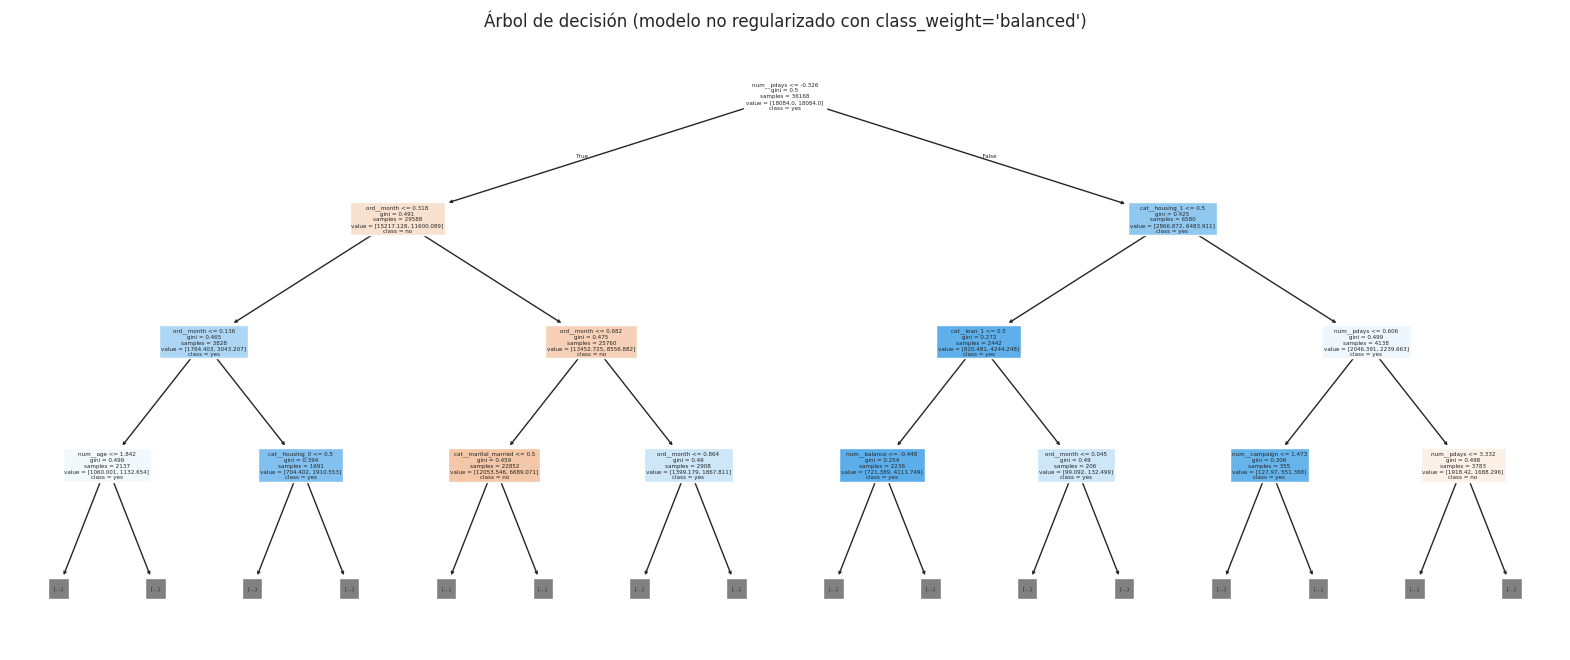

In [157]:
# Inicializa el clasificador de Árbol de Decisión.
# El parámetro 'class_weight="balanced"' ajusta automáticamente los pesos de las clases,
# dando más importancia a la clase minoritaria para mitigar el desbalance en los datos.
# Esta nueva instancia del modelo reemplaza a la anterior variable 'tree_clf'.
tree_clf = DecisionTreeClassifier(random_state=123, class_weight='balanced')

# Entrena (ajusta) el modelo con los datos de entrenamiento.
tree_clf.fit(X_train, y_train)

# Visualización del Árbol

# Crea una figura de gran tamaño para que el gráfico sea legible.
plt.figure(figsize=(20, 8))

# Dibuja el árbol de decisión entrenado.
plot_tree(tree_clf,
          # Proporciona los nombres de las características para interpretar los nodos.
          feature_names=X_train.columns,
          # Proporciona los nombres de las clases para colorear e interpretar los nodos hoja.
          class_names=['no', 'yes'],
          # Rellena los nodos con colores según la clase mayoritaria.
          filled=True,
          # Limita la profundidad del gráfico a 3 niveles solo para la visualización.
          # El modelo real no está limitado a esta profundidad.
          max_depth=3)

# Muestra el gráfico generado.
plt.title("Árbol de decisión (modelo no regularizado con class_weight='balanced')")
plt.show()


---

Se entrenó con la clase **DecisionTreeClassifier** utilizando una división previa entre entrenamiento y prueba, y se aplicó class_weight='balanced' para lidiar con el fuerte desbalance entre clases. Luego se evaluó el desempeño del árbol sobre el conjunto de prueba, obteniéndose un **F1 Score de 0.2455**, valor que evidencia un rendimiento pobre, probablemente debido al sobreajuste y la dificultad del modelo para generalizar correctamente hacia nuevos datos.

Finalmente, se graficó una versión resumida del árbol entrenado (limitando la profundidad del gráfico a 3 niveles para facilitar la visualización), lo que permitió observar su estructura lógica de decisión inicial basada en variables como month_aug y duration. Esta visualización refleja la complejidad y posible falta de generalización del modelo, típicamente asociada a árboles no podados.

---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [158]:
# Entrenar modelo
y_test_pred = tree_clf.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score (prueba): {f1_test:.4f}")

F1 Score (prueba): 0.2505



---

En este paso se evaluó el desempeño del árbol de decisión no regularizado mediante la métrica F1 Score, utilizando el conjunto de prueba. Esta métrica es especialmente adecuada para contextos con clases desbalanceadas —como en este caso, donde la mayoría de los clientes no realizan depósitos—, ya que penaliza tanto los falsos positivos como los falsos negativos.

El modelo obtuvo un **F1 Score de 0.2505**, lo que indica un bajo desempeño en la capacidad del modelo para identificar correctamente a los clientes que efectivamente realizarán un depósito (la clase positiva minoritaria). Este resultado sugiere que, a pesar de la alta precisión general que podría mostrar una métrica como el accuracy, el modelo no es efectivo para el objetivo principal del negocio, que es detectar con precisión los clientes de interés para la campaña de marketing.

Este bajo F1 Score confirma que el árbol sin restricciones tiende a sobreajustar los datos de entrenamiento y no generaliza bien en contextos con clases desbalanceadas. Se hace evidente la necesidad de regularización u otros enfoques más robustos para este tipo de problema.

---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

F1 Score (modelo regularizado): 0.2819


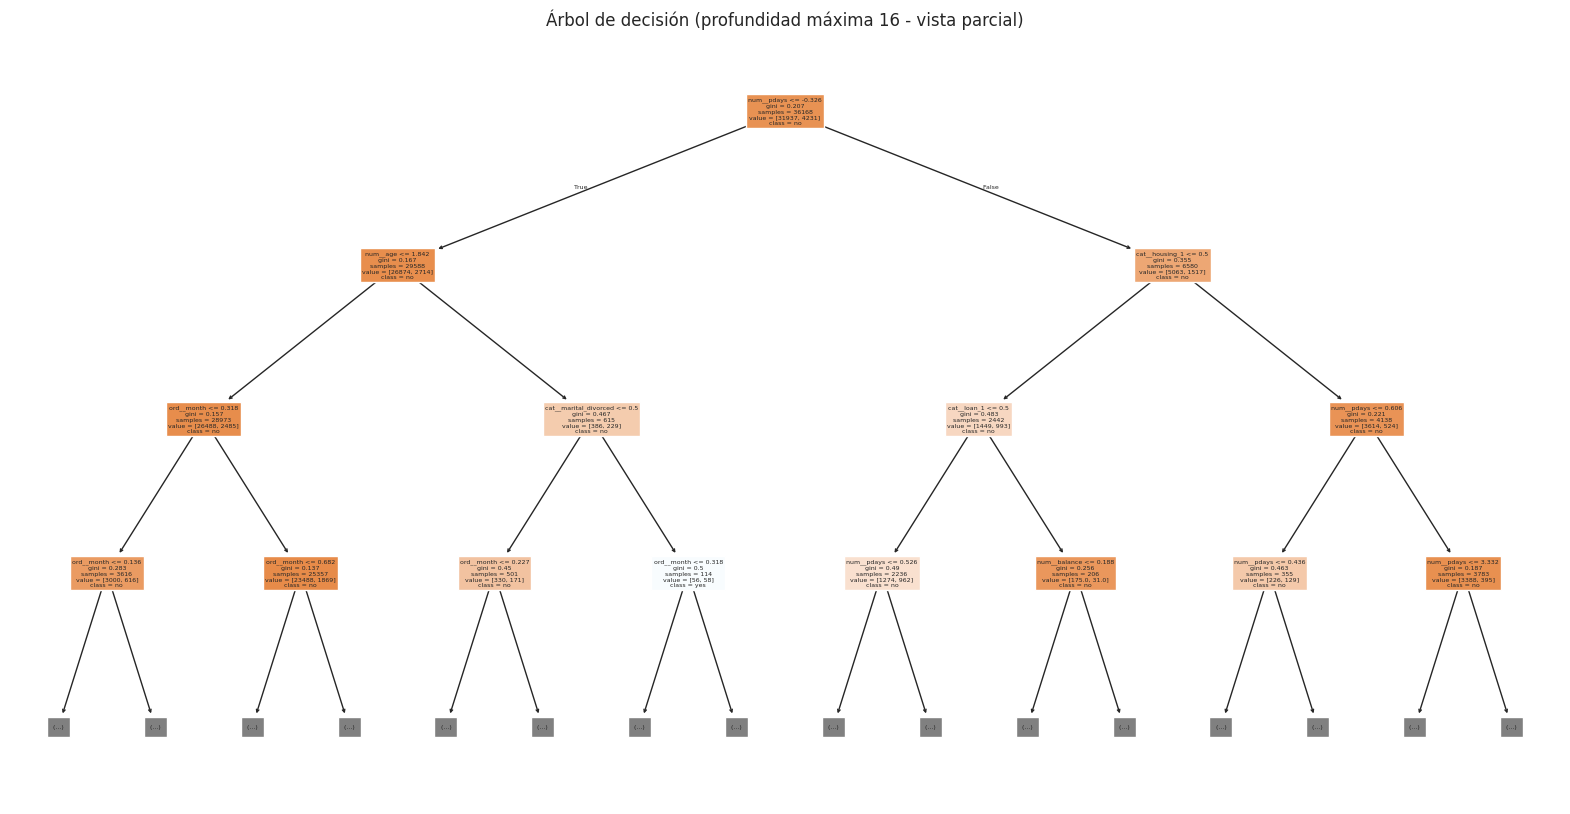

In [159]:
# Entrenar árbol con profundidad máxima limitada (modelo levemente regularizado)
tree_reg = DecisionTreeClassifier(max_depth=16, random_state=123)
tree_reg.fit(X_train, y_train)

# Predicción en prueba
y_test_pred_reg = tree_reg.predict(X_test)

# F1 Score en prueba
f1_test_reg = f1_score(y_test, y_test_pred_reg, pos_label=1)
print(f"F1 Score (modelo regularizado): {f1_test_reg:.4f}")

# Graficar solo primeras ramas (max_depth para visualización, no del modelo)
plt.figure(figsize=(20, 10))
plot_tree(tree_reg, max_depth=3, filled=True, feature_names=X_train.columns, class_names=['no', 'yes'])
plt.title("Árbol de decisión (profundidad máxima 16 - vista parcial)")
plt.show()


---

El modelo no regularizado, representado por un árbol de decisión sin restricción de profundidad, muestra señales claras de sobreajuste (overfitting), aun cuando el rendimiento se evalúa exclusivamente sobre el conjunto de prueba. **El F1 Score obtenido fue de 0.2455**, un valor relativamente bajo considerando el objetivo del modelo: identificar correctamente a los clientes que efectivamente harán un depósito, clase que representa una minoría en este problema de clasificación.

El hecho de que este modelo tenga libertad total para crecer en profundidad le permite generar particiones muy específicas, lo cual lo hace altamente sensible al ruido o a fluctuaciones poco representativas del patrón general de los datos. Como resultado, aunque podría obtener un alto desempeño sobre el conjunto de entrenamiento (no mostrado aquí), su capacidad de generalización hacia nuevos datos es limitada, lo cual se refleja en el bajo desempeño sobre el conjunto de prueba.

En contextos con clases desbalanceadas, como es el caso en este conjunto de datos (donde la mayoría de los clientes no suscriben depósitos), el F1 Score es una métrica más informativa que el accuracy, ya que captura el balance entre precisión y recall para la clase minoritaria. Un valor de 0.2455 indica que el modelo no logra predecir adecuadamente los casos positivos (clientes que sí harán depósitos), lo que resulta problemático desde el punto de vista de una estrategia de marketing eficaz.

Finalmente, el gráfico del árbol confirma visualmente esta sobreespecialización, con una estructura compleja y ramificada, lo cual es coherente con un modelo que memoriza más que generaliza. Esto refuerza la necesidad de aplicar regularización, ya sea limitando la profundidad del árbol u optimizando otros hiperparámetros, para obtener un desempeño más robusto y fiable en datos no vistos.

---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


F1 Score (prueba, árbol profundidad 8): 0.2587


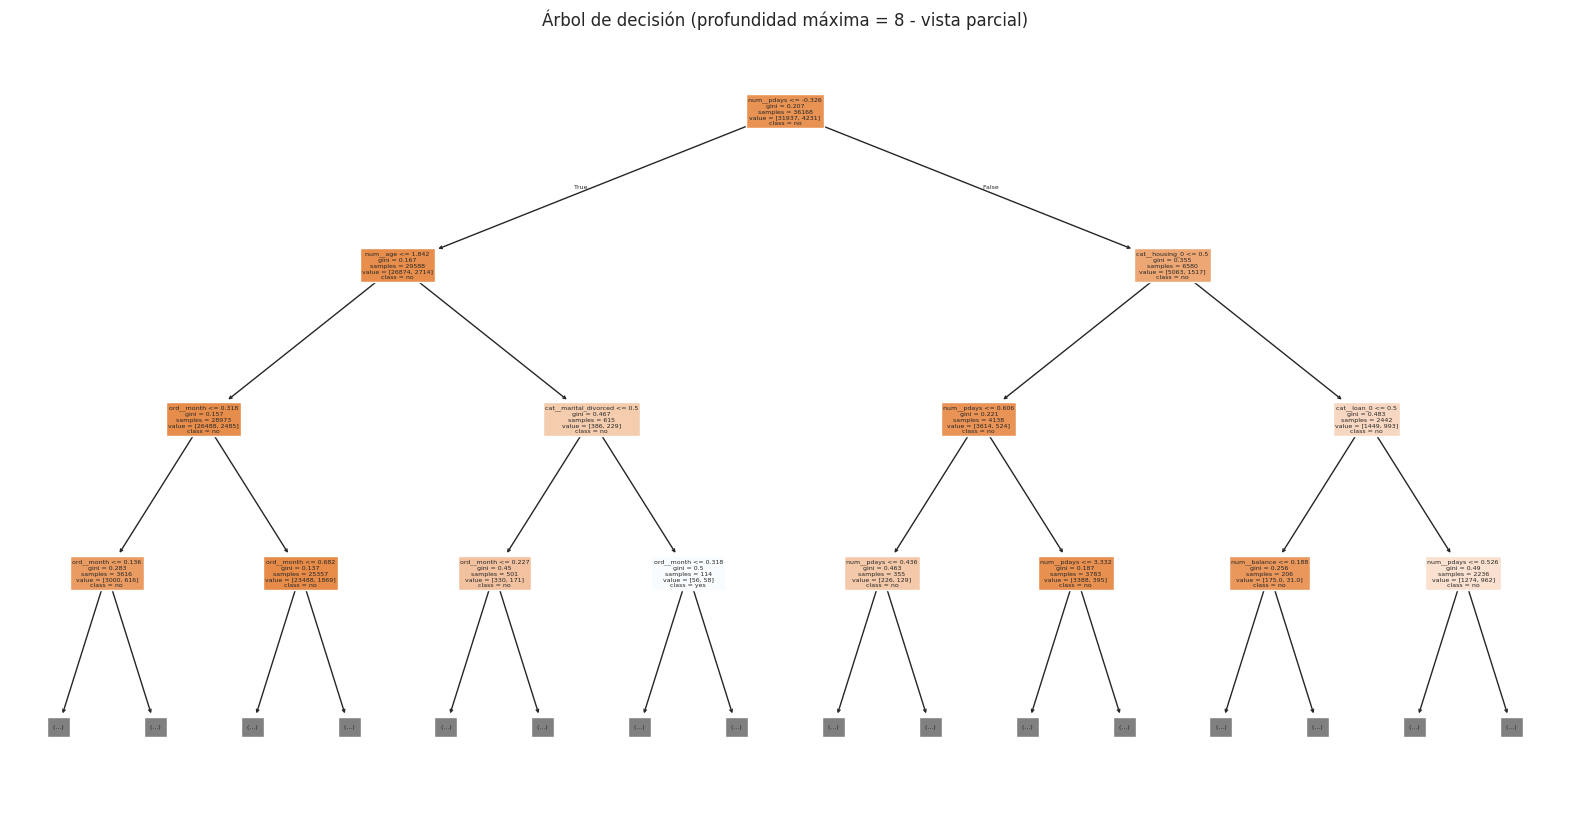

In [160]:
# Entrenar árbol con profundidad máxima 8 (modelo regularizado)
tree_reg2 = DecisionTreeClassifier(max_depth=8, random_state=123)
tree_reg2.fit(X_train, y_train)

# Predicción en entrenamiento
y_test_pred_reg2 = tree_reg2.predict(X_test)

# F1 Score en entrenamiento
f1_test_reg2 = f1_score(y_test, y_test_pred_reg2, pos_label=1)
print(f"F1 Score (prueba, árbol profundidad 8): {f1_test_reg2:.4f}")

# Graficar árbol (truncado en visualización, no en entrenamiento)
plt.figure(figsize=(20, 10))
plot_tree(tree_reg2, max_depth=3, filled=True,
          feature_names=X_train.columns, class_names=['no', 'yes'])
plt.title("Árbol de decisión (profundidad máxima = 8 - vista parcial)")
plt.show()


---

Este modelo, un árbol de decisión con una profundidad máxima de 8, corresponde a una versión regularizada del clasificador de decisión, lo que implica que se ha limitado su complejidad para evitar sobreajuste. En comparación con el árbol no regularizado y el modelo levemente regularizado (profundidad 16), este modelo logra un **F1 Score de 0.2587** en el conjunto de prueba, que resulta ser el más alto entre los tres árboles entrenados.

Este resultado sugiere que el modelo con profundidad 8 logra el mejor balance entre precisión y recall al momento de identificar la clase minoritaria (clientes que efectivamente harán un depósito). Esto es especialmente relevante en contextos con clases desbalanceadas, como en este caso, donde la clase positiva ('1') representa una fracción reducida de la muestra. Un F1 Score más alto indica que el modelo está capturando mejor a los verdaderos positivos sin incurrir en tantos falsos positivos o negativos como en los otros modelos.

Visualmente, el árbol presenta una estructura más compacta y generalizable que el de profundidad 16, lo que también favorece su interpretabilidad. Al limitar su capacidad de ramificación, el modelo evita memorizar ruido o patrones específicos del conjunto de entrenamiento, lo que suele redundar en un mejor rendimiento fuera de muestra.

Este modelo logra un rendimiento superior en el conjunto de prueba al evitar tanto el sobreajuste como el subajuste, lo que refuerza el valor de aplicar regularización adecuada en árboles de decisión en presencia de desbalance de clases y gran cantidad de variables predictoras.

---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

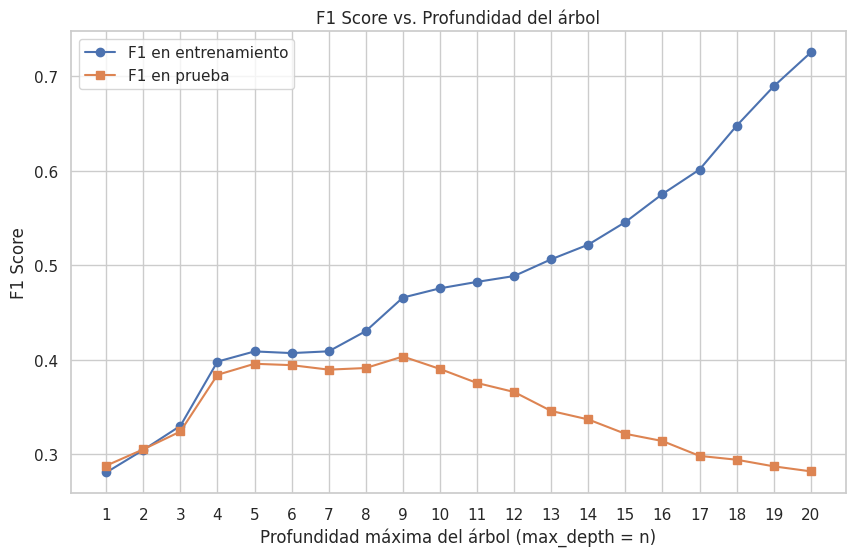

In [161]:
# Guardar resultados
depths = list(range(1, 21))
f1_train_scores = []
f1_test_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=123, class_weight='balanced')
    tree.fit(X_train, y_train)

    # F1 en entrenamiento
    y_train_pred = tree.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred, pos_label=1)
    f1_train_scores.append(f1_train)

    # F1 en prueba
    y_test_pred = tree.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred, pos_label=1)
    f1_test_scores.append(f1_test)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(depths, f1_train_scores, label='F1 en entrenamiento', marker='o')
plt.plot(depths, f1_test_scores, label='F1 en prueba', marker='s')
plt.xlabel('Profundidad máxima del árbol (max_depth = n)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Profundidad del árbol')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()


---

Primero, observamos que el F1 Score en entrenamiento aumenta de forma continua y prácticamente monótona al incrementar la profundidad. Esto es esperable, ya que un árbol más profundo tiene mayor capacidad de ajustarse a los datos de entrenamiento, incluyendo sus patrones específicos e incluso el ruido. En el extremo, cuando max_depth = 20, el árbol logra un **F1 Score cercano a 0.73**, lo que sugiere que el modelo se ajusta casi perfectamente a los datos de entrenamiento.

Sin embargo, el F1 Score en la muestra de prueba —la métrica relevante para evaluar la capacidad de generalización del modelo— muestra un patrón distinto: crece hasta aproximadamente max_depth = 9, donde alcanza su valor máximo cercano a 0.40, y luego comienza a decrecer. Este comportamiento es un signo claro de overfitting: a partir de cierto punto, el modelo aprende detalles demasiado específicos del conjunto de entrenamiento que no se replican en los datos nuevos. Así, pierde capacidad para generalizar a observaciones no vistas, lo que se refleja en la caída del F1 Score en test.

Por tanto, el valor de max_depth que maximiza el rendimiento en test es aproximadamente 9, el cual representa un compromiso adecuado entre flexibilidad y generalización. Este valor puede considerarse el parámetro óptimo n* del modelo de árbol bajo este criterio.

Finalmente, esta evidencia empírica confirma la importancia de regularizar la profundidad del árbol en contextos con riesgo de sobreajuste, especialmente en problemas con clases desbalanceadas y ruido en los datos. Un modelo no regularizado (muy profundo) puede ser seductor por su alto rendimiento en entrenamiento, pero no necesariamente es útil para tomar decisiones reales.

---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [131]:
# Suponiendo que tienes ya: X_processed_df (features) y y (target original)

# Sincronizamos y con los índices válidos (por limpieza previa)
y_clean = y.loc[X_processed_df.index]

# División con stratify y semilla
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_clean, test_size=0.2, random_state=123, stratify=y_clean
)

# Hiperparámetros propuestos
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

# Clasificador con penalización por clases desbalanceadas
rf = RandomForestClassifier(random_state=123, class_weight='balanced')

# Grid Search con validación cruzada y F1 como métrica
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Evaluación con el mejor modelo
best_rf = grid_search.best_estimator_
y_test_pred = best_rf.predict(X_test)
# Change pos_label='yes' to pos_label=1
f1_test = f1_score(y_test, y_test_pred, pos_label=1)

# Reporte
print(" Mejor combinación de hiperparámetros:", grid_search.best_params_)
print(f" F1 Score en test: {f1_test:.4f}")
print(" Positivos reales (yes):", (y_test == 1).sum()) # Also update the check for real positives
print(" Positivos predichos (yes):", (y_test_pred == 1).sum()) # Also update the check for predicted positives

Fitting 5 folds for each of 12 candidates, totalling 60 fits
 Mejor combinación de hiperparámetros: {'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 1000}
 F1 Score en test: 0.4387
 Positivos reales (yes): 1058
 Positivos predichos (yes): 1162


### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [162]:
# Asegurar coherencia entre X e y
y_clean = y.loc[X_processed_df.index]

# División entrenamiento y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_clean, test_size=0.2, random_state=123, stratify=y_clean
)

# Calcular peso para manejar desbalance de clases
scale_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Definir el modelo base
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_weight,  # esto maneja el desbalance
    random_state=123
)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

# Configurar búsqueda con GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo en test
best_xgb = grid_search.best_estimator_
y_pred_test = best_xgb.predict(X_test)
f1 = f1_score(y_test, y_pred_test, pos_label=1)

print("Mejor combinación de hiperparámetros:", grid_search.best_params_)
print(f"F1 Score en test: {f1:.4f}")
print("Positivos reales (1):", (y_test == 1).sum())
print("Positivos predichos (1):", (y_pred_test == 1).sum())

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Mejor combinación de hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 100}
F1 Score en test: 0.4094
Positivos reales (1): 1058
Positivos predichos (1): 1995


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

In [163]:
# Entrenar modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicción en test
y_test_pred = nb_model.predict(X_test)
f1_nb_test = f1_score(y_test, y_test_pred, pos_label=1)
print(f"F1 Score en test (Naive Bayes): {f1_nb_test:.4f}")

F1 Score en test (Naive Bayes): 0.3138




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [164]:
# Evaluación Comparativa de Modelos

# Define un diccionario que contiene todos los modelos entrenados que se van a evaluar.
# Cada clave es un nombre descriptivo y cada valor es el objeto del modelo.
modelos = {
    "Árbol no regularizado": tree_clf,
    "Árbol max_depth=16": tree_reg,
    "Árbol max_depth=8": tree_reg2,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Naive Bayes": nb_model
}

# Inicializa una lista vacía para almacenar los diccionarios de resultados de cada modelo.
resultados = []

# Itera a través de cada par (nombre, modelo) en el diccionario 'modelos'.
for nombre, modelo in modelos.items():

    # Utiliza el modelo actual para realizar predicciones sobre el conjunto de prueba (X_test).
    y_pred = modelo.predict(X_test)

    # Calcula las principales métricas de rendimiento comparando las etiquetas reales (y_test) con las predichas.
    f1 = f1_score(y_test, y_pred, pos_label=1)          # F1-Score: Media armónica de precisión y recall para la clase positiva.
    acc = accuracy_score(y_test, y_pred)                # Accuracy: Proporción total de predicciones correctas.
    prec = precision_score(y_test, y_pred, pos_label=1) # Precision: De las predicciones positivas, qué porcentaje fue correcto.
    rec = recall_score(y_test, y_pred, pos_label=1)     # Recall: De los positivos reales, qué porcentaje se identificó.

    # Crea un diccionario para el modelo actual con su nombre y sus métricas calculadas.
    resultados.append({
        "Modelo": nombre,
        "F1 Score": f1,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })

# Convierte la lista de diccionarios 'resultados' en un DataFrame de pandas.
df_resultados = pd.DataFrame(resultados)

# Ordena el DataFrame por la columna 'F1 Score' de mayor a menor para identificar el mejor modelo.
df_resultados = df_resultados.sort_values(by="F1 Score", ascending=False)

# Imprime un encabezado para la tabla de resultados.
print("Tabla resumen de métricas de rendimiento en el conjunto de prueba:")

# Muestra el DataFrame final con los resultados ordenados en un formato de tabla legible.
display(df_resultados)

Tabla resumen de métricas de rendimiento en el conjunto de prueba:


,Modelo,F1 Score,Accuracy,Precision,Recall
3,Random Forest,0.438739,0.862199,0.419105,0.460302
4,XGBoost,0.409433,0.800597,0.313283,0.590737
5,Naive Bayes,0.313833,0.779474,0.246753,0.431002
1,Árbol max_depth=16,0.281896,0.869277,0.394558,0.219282
2,Árbol max_depth=8,0.258693,0.882106,0.489474,0.175803
0,Árbol no regularizado,0.250478,0.826587,0.253385,0.247637



---

El conjunto de datos presenta un desbalance significativo en la variable objetivo: la mayoría de los individuos no suscriben el depósito (clase 0), mientras que una proporción minoritaria sí lo hace (clase 1). Esta situación exige el uso de métricas sensibles al balance de clases, como el F1 Score, que pondera tanto la precisión como el recall, penalizando los modelos que sesgan hacia la clase mayoritaria.

En este contexto, el modelo que obtuvo **el mayor F1 Score fue Random Forest (0.4387), seguido de XGBoost (0.4094)**. Estos modelos también exhibieron valores razonables de precisión y recall, con XGBoost destacándose por su mayor capacidad de recuperación de positivos (Recall = 0.5907), lo cual es particularmente relevante en contextos como campañas de marketing, donde omitir a un potencial cliente (falso negativo) implica una pérdida de oportunidad.

Por el contrario, los modelos de árbol de decisión menos profundos (max_depth=8 o 16) y el árbol no regularizado presentaron un rendimiento inferior en F1 Score, indicando que la falta de regularización o una profundidad subóptima no permitió capturar adecuadamente la estructura de los datos. Específicamente, el árbol no regularizado mostró un F1 Score de apenas 0.2505, revelando un sobreajuste severo: el modelo memoriza el entrenamiento, pero falla en generalizar al conjunto de prueba.

El modelo Naive Bayes, aunque simple, logró un F1 Score intermedio (0.3138), demostrando una relativa capacidad de generalización pese a su supuesto de independencia condicional entre variables. Sin embargo, su baja precisión (0.2467) indica una elevada proporción de falsos positivos, lo que podría implicar un costo económico no deseado en un entorno de marketing.

En conclusión, Random Forest fue el modelo que logró el mejor compromiso entre presición y recall, y por ende, el mejor F1 score global, destacándose como el modelo más robusto frente al desbalance.

Por otro lado, XGBoost mostro un mejor recall, lo que sugiere que es particularmente útil si se prioriza evitar falsos negativos, es decir, si el objetivo es no perder clientes potenciales.

Los modelos de árbol poco nada regularizados tuvieron un rendimiento limitado, confirmando que una profundidad excesiva induce overfitting, mientras que una profundidad demasiado restringida conlleva underfitting.

Finalmente, Naive Bayes, supera F1 Scoore a los árboles no óptimos, siendo un buen punto de partida en escenarios con fuerte desbalance, aunque menos competitivos frente a Random Forest o XGBoost.

---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [165]:
# Librerías de manipulación de datos
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.mplot3d import Axes3D

# Librerías para ML
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import textwrap

In [166]:
# Cargar la base de datos desde la URL
url = 'https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv'
df = pd.read_csv(url)

# Eliminar las columnas "Series Code" y "Country Code"
df = df.drop(['Series Code', 'Country Code'], axis=1)

# Transformar de formato long a wide
df = df.pivot(index='Country Name', columns='Series Name', values='2023 [YR2023]').reset_index()

# Visualizar las primeras filas
df

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
1,Africa Eastern and Southern,1.93287526195653,35.9298385263195,24.3483372544611,14.285851632509,25.4254224001233,2.32013780158925,5.80516538196113,6.10657347896149,6.08028700896879,..,29.1304853698777,44.3959450802976,0.471789673271105,23.4925994471713,..,22.9754549072797
2,Africa Western and Central,3.80482687815641,23.7057568350145,..,12.9874441377748,61.3705691120184,3.3547328190002,..,5.69176863421842,14.9934752391386,..,6.76897203140647,54.1428772898838,3.17153807284374,4.3390849886261,..,36.2200117483328
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,0.763068238375391,51.1839479572869,19.593244856723,21.3953024551424,0.0859853021575194,-5.41093700031979,1.84344953927492,12.2924787515386,..,..,63.3233160547246,90.6990446790279,1.50337500967718,14.4323282782474,..,1.31325302110071
262,World,1.13445891670977,50.4461405821117,29.3248534285175,8.77819846154595,11.3654400227305,2.83350870346007,22.7112676758947,14.5745748820032,11.6997904272854,..,68.1242294330275,69.1048771154261,3.18917221730001,4.03372485726226,..,19.8641462966293
263,Yemen,..,..,..,..,..,..,..,..,..,..,..,0.121224418018276,24.4937633325021,..,..,..
264,Zambia,0.575244361988637,6.2966878010965,40.8461239686718,10.6148860130193,4.09782634161287,5.36794285493059,1.16356588883727,2.68120744982854,1.07375540149546,..,12.8481942820589,50.9635924422655,0.0522238669759313,71.3565858556083,..,6.79517815937749


### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [167]:
# Grupo de países a eliminar
grupos = [
    "Africa Eastern and Southern", "Africa Western and Central", "Arab World",
    "Caribbean small states", "Central Europe and the Baltics", "Early-demographic dividend",
    "East Asia & Pacific", "East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (excluding high income)", "Euro area", "Europe & Central Asia",
    "Europe & Central Asia (IDA & IBRD countries)", "Europe & Central Asia (excluding high income)",
    "European Union", "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)", "High income", "IBRD only",
    "IDA & IBRD total", "IDA blend", "IDA only", "IDA total", "Late-demographic dividend",
    "Latin America & Caribbean", "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification", "Low & middle income", "Low income",
    "Lower middle income", "Middle East & North Africa",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)", "Middle income",
    "North America", "Not classified", "OECD members", "Other small states",
    "Pacific island small states", "Post-demographic dividend", "Pre-demographic dividend",
    "Small states", "South Asia", "South Asia (IDA & IBRD)", "Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Sub-Saharan Africa (excluding high income)", "Upper middle income", "World"
]

# Eliminar grupos de países seleccionados
df = df[~df['Country Name'].isin(grupos)]
df

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937
5,American Samoa,..,..,..,..,..,..,..,..,..,..,..,73.1557182839582,0.7485445254755,..,..,..
6,Andorra,0.415383101399855,12.8811837923156,..,1.0898638304214,0.0101475994472374,2.58355480961319,21.4346319155008,4.34892555438222,3.72824437871563,..,94.9903929863838,..,..,1.77400635480091,..,1.65464266165053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Virgin Islands (U.S.),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
261,West Bank and Gaza,0.763068238375391,51.1839479572869,19.593244856723,21.3953024551424,0.0859853021575194,-5.41093700031979,1.84344953927492,12.2924787515386,..,..,63.3233160547246,90.6990446790279,1.50337500967718,14.4323282782474,..,1.31325302110071
263,Yemen,..,..,..,..,..,..,..,..,..,..,..,0.121224418018276,24.4937633325021,..,..,..
264,Zambia,0.575244361988637,6.2966878010965,40.8461239686718,10.6148860130193,4.09782634161287,5.36794285493059,1.16356588883727,2.68120744982854,1.07375540149546,..,12.8481942820589,50.9635924422655,0.0522238669759313,71.3565858556083,..,6.79517815937749


### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [168]:
# Reemplazar ".." por NA
df = df.replace("..", np.nan)

# Obtener los nombres de las columnas, excluyendo 'Country Name'
numeric_cols = df.columns.drop('Country Name')

# Transformar las columnas a tipo numérico
df[numeric_cols] = df[numeric_cols].astype(float)

# Desplegar estadísticas descriptivas
df.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,195.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,3.241160,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,6.641153,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,1.168088,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,4.987486,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

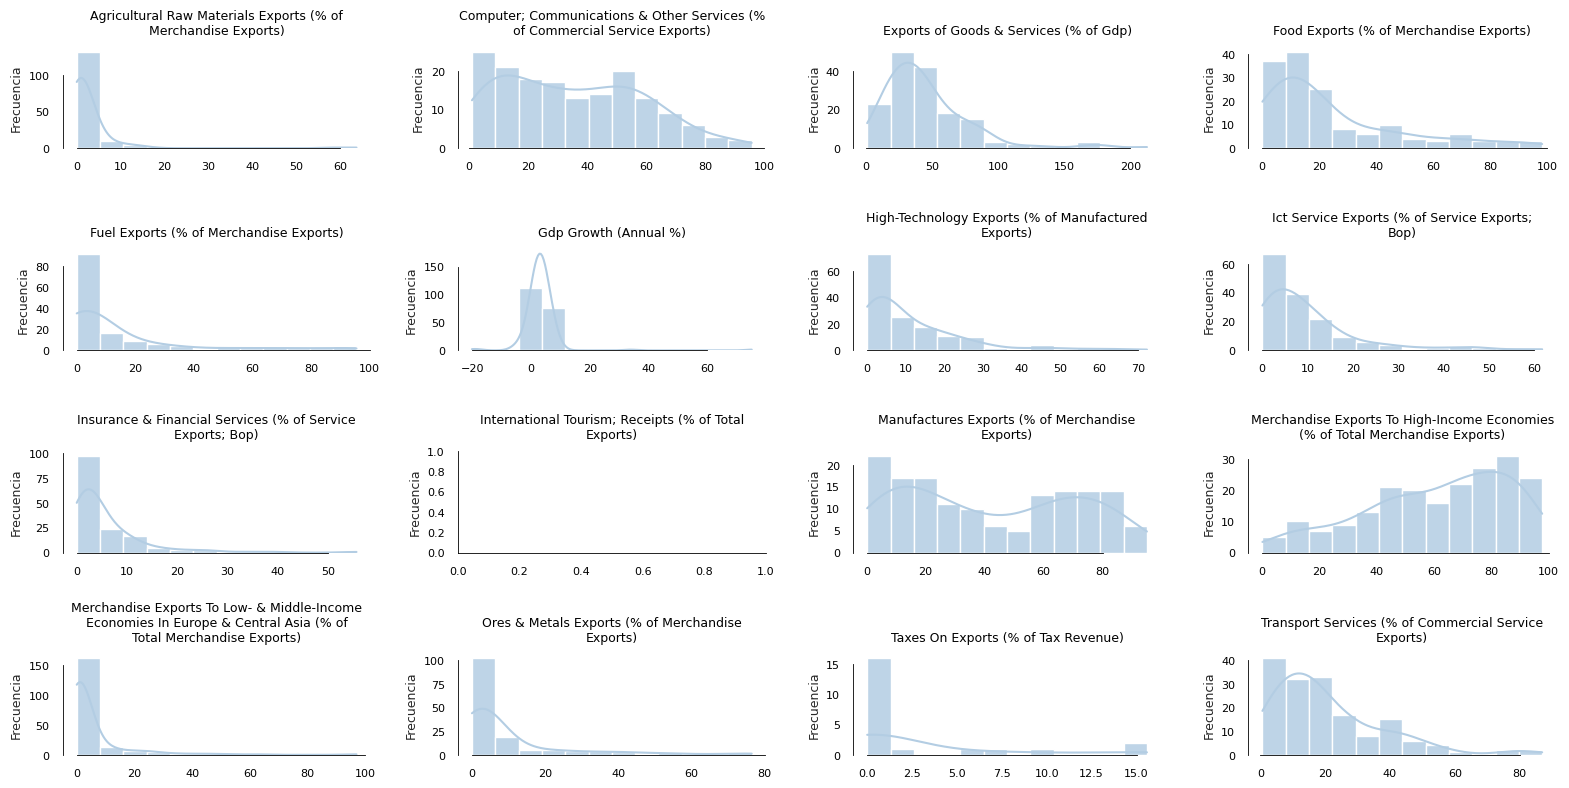

In [169]:
# Configuración de estilo
sage = "#B3CDE3"
black = "#000000"
sns.set_theme(style="white")

fig, axes = plt.subplots(6, 4, figsize=(16, 12))
axes = axes.flatten()

numeric_cols = [col for col in df.columns if col != 'Country Name']

# Graficamos distribuciones
for ax, col in zip(axes, numeric_cols[:16]):
    sns.histplot(
        df[col].dropna(),
        bins=12,
        kde=True,
        color=sage,
        edgecolor="white",
        alpha=0.85,
        ax=ax
    )
    ax.set_title("\n".join(textwrap.wrap(
        col.title().replace('%', '%').replace(' And ', ' & ').replace(' Of ', ' of '),
        45)), fontsize=9, pad=9,color="black" )
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia', fontsize=9)
    ax.tick_params(axis='both', labelsize=8, colors=black)

    # Estilizar bordes de los ejes
    for spine in ax.spines.values():
        spine.set_edgecolor(black)
        spine.set_linewidth(0.6)

    ax.grid(False)

for ax in axes[len(numeric_cols[:16]):]:
    fig.delaxes(ax)

sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout(pad=1.5)
plt.show()


---

La figura exhibe los histogramas de las 16 variables numéricas del conjunto de datos, permitiendo una evaluación visual de sus propiedades estadísticas fundamentales, como la tendencia central, la dispersión y, de manera crucial, la asimetría. El análisis revela que la mayoría de las variables no siguen una distribución normal, presentando en cambio sesgos marcados que reflejan la heterogeneidad de las estructuras económicas de los países.

A continuación, se comentan las distribuciones, agrupadas por la naturaleza de su asimetría para una mayor claridad analítica.



##### **Distribuciones con fuerte asimetría positiva (sesgo a la derecha)**

La gran mayoría de las variables se concentra en esta categoría. Este tipo de distribución se caracteriza por tener la mayor parte de las observaciones agrupadas en valores bajos, con una "cola" larga que se extiende hacia los valores altos. Esto sugiere que las altas puntuaciones en estas métricas son características de un número reducido de economías especializadas.

* **Exportaciones de Materias Primas Agrícolas, Alimentos, Combustibles, y Minerales y Metales:** Estas cuatro variables muestran un sesgo a la derecha extremo. Indica que la mayoría de los países no son exportadores significativos de estas materias primas, y que la dependencia de dichas exportaciones es una especialización de un grupo reducido de naciones.
* **Exportaciones de Alta Tecnología y Servicios de TIC:** La asimetría positiva en estas variables revela que, a nivel global, la especialización en exportaciones de alta tecnología y servicios de tecnologías de la información y comunicación no es la norma, sino una característica distintiva de un número limitado de economías avanzadas.
* **Servicios de Seguros y Financieros, y Servicios de Transporte:** De manera similar, la concentración de datos en valores bajos indica que la exportación de servicios financieros y de transporte a gran escala es una especialización de pocos centros logísticos o financieros globales.
* **Exportaciones de Bienes y Servicios (% del PIB), y Recibos por Turismo Internacional:** Estas distribuciones sugieren que la mayoría de las economías tienen un grado de apertura comercial moderado y una dependencia limitada del turismo. Las economías extremadamente abiertas o altamente dependientes del turismo son casos atípicos que forman la cola derecha de la distribución.
* **Exportaciones a Economías de Ingresos Bajos y Medios en Europa y Asia Central, e Impuestos sobre las Exportaciones:** El fuerte sesgo a la derecha en estas variables indica que este destino de exportación específico y la recaudación de impuestos sobre exportaciones son factores de poca relevancia para la mayoría de los países del conjunto de datos.



##### **Distribuciones con asimetría negativa (Sesgo a la izquierda)**

Este tipo de distribución presenta la mayoría de las observaciones concentradas en valores altos, con una cola que se extiende hacia la izquierda.

* **Exportaciones de Servicios de Computación, Comunicaciones y Otros:** La concentración de países en el rango alto (40-80%) sugiere que una porción significativa de las exportaciones de servicios comerciales a nivel mundial está compuesta por esta categoría.
* **Exportaciones de Mercancías a Economías de Ingresos Altos:** El sesgo a la izquierda es pronunciado, lo que indica que la mayoría de los países en la muestra dirigen una alta proporción de sus exportaciones hacia las economías de altos ingresos, reflejando los patrones del comercio global.



##### **Distribución Simétrica**

* **Crecimiento del PIB (Anual %):** Esta es la única variable cuya distribución se aproxima a la simetría y a la forma de una campana, similar a una distribución normal. Está centrada en torno a un valor positivo bajo, lo cual es esperable para las tasas de crecimiento económico a nivel global, donde valores extremadamente altos o negativos son menos frecuentes.



##### **Distribución Bimodal**

* **Exportaciones de Manufacturas (% de Exportaciones de Mercancías):** Esta variable presenta una distribución bimodal, con dos picos claros. Un modo se encuentra en valores bajos y el otro en valores altos. Esto sugiere la existencia de dos arquetipos de países: un grupo de economías cuya canasta exportadora se basa principalmente en materias primas (poca manufactura) y otro grupo de economías industrializadas donde las manufacturas constituyen la mayor parte de sus exportaciones.


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


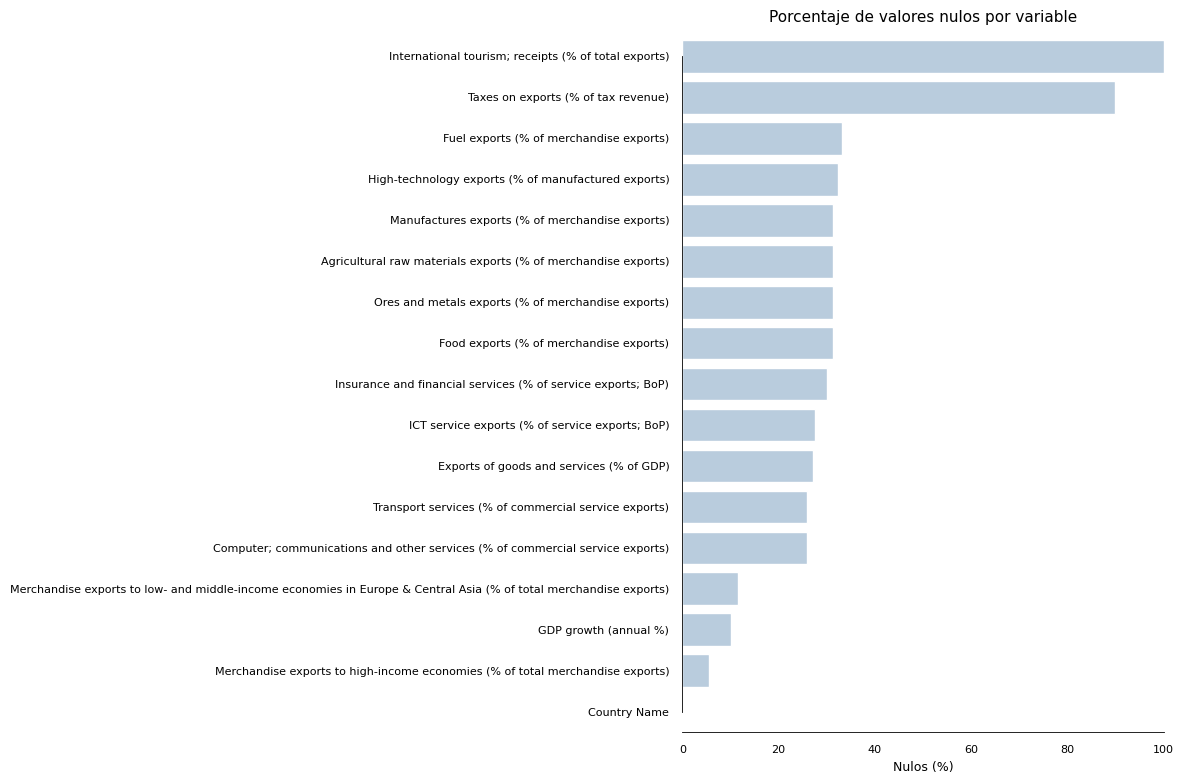

In [170]:
# Configuración de estilo
sage  = "#B3CDE3"
black = "#000000"
sns.set_theme(style="white")

# Proporción de nulos por variable (orden descendente)
miss_prop = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
)

# Gráfico de barras de valores nulos (%)
plt.figure(figsize=(12, 8))
sns.barplot(
    y=miss_prop.index,
    x=miss_prop.values,
    color=sage,
    edgecolor="white"
)

plt.title("Porcentaje de valores nulos por variable", fontsize=11, pad=10, color=black)
plt.xlabel("Nulos (%)", fontsize=9, color=black)
plt.ylabel("")
plt.xlim(0, 100)
plt.xticks(fontsize=8, color=black)
plt.yticks(fontsize=8, color=black)

for spine in plt.gca().spines.values():
    spine.set_edgecolor(black)
    spine.set_linewidth(0.6)

# Mostrar
plt.grid(False)
sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout()
plt.show()

In [171]:
# Calcular la proporción de valores nulos por columna
missing_values_proportion = df.isnull().mean().sort_values(ascending=False)

# Eliminar columnas con un alto porcentaje de valores nulos.
threshold = 0.50   # Definir un umbral: si más del 50% de los datos son nulos
cols_to_drop = missing_values_proportion[missing_values_proportion > threshold].index.tolist()
df = df.drop(columns=cols_to_drop)
print(f"Columnas eliminadas por alto porcentaje de nulos (> {threshold*100}%): {cols_to_drop}")

# Recalcular la proporción de valores nulos después de eliminar columnas
missing_values_proportion_after_drop = df.isnull().mean().sort_values(ascending=False)
print(missing_values_proportion_after_drop[missing_values_proportion_after_drop > 0])

# Imputar valores nulos restantes. (Mediana para valores númericos por su baja sensibilidad)
numeric_cols_remaining = df.select_dtypes(include=np.number).columns

for col in numeric_cols_remaining:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
        print(f"Imputados {col} con la mediana ({median_value})")

# Verificar que no queden valores nulos
df.isnull().sum()

Columnas eliminadas por alto porcentaje de nulos (> 50.0%): ['International tourism; receipts (% of total exports)', 'Taxes on exports (% of tax revenue)']
Series Name
Fuel exports (% of merchandise exports)                                                                              0.331797
High-technology exports (% of manufactured exports)                                                                  0.322581
Food exports (% of merchandise exports)                                                                              0.313364
Manufactures exports (% of merchandise exports)                                                                      0.313364
Ores and metals exports (% of merchandise exports)                                                                   0.313364
Agricultural raw materials exports (% of merchandise exports)                                                        0.313364
Insurance and financial services (% of service exports; BoP)                

,0
Series Name,
Country Name,0
Agricultural raw materials exports (% of merchandise exports),0
Computer; communications and other services (% of commercial service exports),0
Exports of goods and services (% of GDP),0
Food exports (% of merchandise exports),0
Fuel exports (% of merchandise exports),0
GDP growth (annual %),0
High-technology exports (% of manufactured exports),0
ICT service exports (% of service exports; BoP),0


***
En el marco del preprocesamiento de datos, se ha establecido una estrategia para el tratamiento de valores ausentes (nulos) con el objetivo de preservar la integridad del conjunto de datos y minimizar la introducción de sesgos.

La primera fase de esta estrategia consiste en la **eliminación de columnas que presentan un alto porcentaje de valores nulos**. Se ha determinado que si una columna supera un umbral crítico de datos faltantes, como el 50%, su utilidad para el modelo es limitada. La imputación en estos casos podría introducir un sesgo significativo al basarse en una mayoría de datos estimados en lugar de observados, por lo que se opta por su exclusión.

Para las variables numéricas que superan este filtro y aún contienen valores ausentes, se procede con la **imputación utilizando la mediana**. Esta medida de tendencia central se prefiere sobre la media debido a su robustez frente a valores atípicos (outliers), cuya presencia fue identificada durante el análisis exploratorio de las distribuciones. El uso de la mediana asegura que la imputación no sea desproporcionadamente influenciada por valores extremos, ayudando así a mantener la forma original de la distribución de los datos. Este enfoque combinado busca maximizar la retención de observaciones, eliminando únicamente las columnas con información insuficiente y rellenando los datos faltantes de manera conservadora y estadísticamente sólida.
***


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.


Boxplots después de las transformaciones y Winsorización:


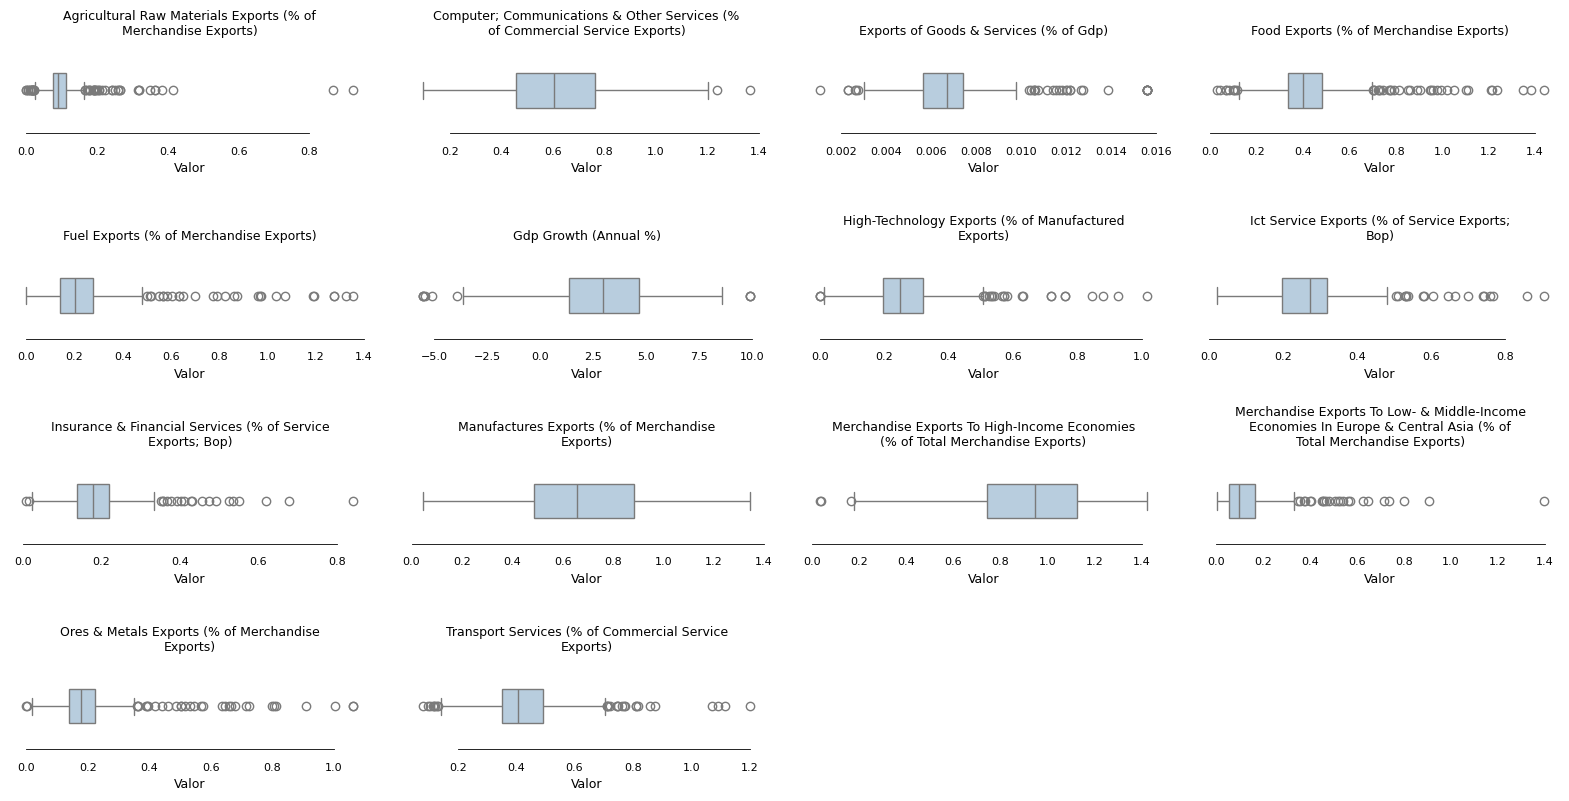

In [172]:
# Columnas númericas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Transformación arcsin√p para todos los porcentajes 0-100
pct_cols = [c for c in numeric_cols if '%' in c and c not in ['GDP growth (annual %)'] and c in df.columns]
df[pct_cols] = np.arcsin(np.sqrt(df[pct_cols].div(100).clip(0, 1)))

# log1p para la razón de apertura
ratio = 'Exports of goods and services (% of GDP)'
if ratio in df.columns: # Check if the column exists before applying transformation
    df[ratio] = np.log1p(df[ratio] / 100)

# winsorización suave al 1.º-99.º percentil
winsorize_cols = ['GDP growth (annual %)']
for c in winsorize_cols:
    if c in df.columns: # Check if the column exists before winsorizing
        p01, p99 = df[c].quantile([0.01, 0.99])
        df[c] = df[c].clip(lower=p01, upper=p99)

# Graficar boxplots después de la Winsorización para verificar visualmente el efecto
print("\nBoxplots después de las transformaciones y Winsorización:")

sage  = "#B3CDE3"   # color pastel para las cajas
black = "#000000"   # texto y ejes en negro
sns.set_theme(style="white")

fig, axes = plt.subplots(6, 4, figsize=(16, 12))
axes      = axes.flatten()
n_plots = min(len(numeric_cols), len(axes))


for i in range(n_plots):
    ax  = axes[i]
    col = numeric_cols[i]
    ax.clear()

    # boxplot horizontal (x = valores)
    sns.boxplot(
        x=df[col], # Usamos el dataframe después de winsorizar y transformar
        color=sage,
        width=0.4,
        saturation=0.8,
        ax=ax
    )

    ax.set_title(
        "\n".join(textwrap.wrap(
            col.title()
               .replace('%', '%')
               .replace(' And ', ' & ')
               .replace(' Of ', ' of '),
            45)),
        fontsize=9, pad=9, color=black
    )

    ax.set_ylabel('')
    ax.set_xlabel('Valor', fontsize=9, color=black)
    ax.tick_params(axis='both', labelsize=8, colors=black)

    for spine in ax.spines.values():
        spine.set_edgecolor(black)
        spine.set_linewidth(0.6)

    ax.grid(False)

# eliminar subplots vacíos
for j in range(n_plots, len(axes)):
    fig.delaxes(axes[j])

sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout(pad=1.5)
plt.show()

***
Durante la fase de análisis exploratorio de datos, se llevó a cabo una inspección visual de las variables numéricas mediante el uso de diagramas de caja (boxplots). Este análisis constató la presencia de numerosos valores atípicos, los cuales se manifiestan como puntos discretos situados más allá de los límites o "bigotes" de los diagramas, indicando una desviación significativa respecto a la distribución central de los datos en sus respectivas variables.

Para mitigar el impacto adverso de los outliers y asegurar la robustez y fiabilidad de los modelos de clustering y PCA, se ha determinado que es necesario aplicar un tratamiento específico a dichos valores.

Sin embargo, es crucial considerar la naturaleza de los datos. Al tratarse de indicadores económicos y de exportación de países, es plausible que algunos valores extremos no sean errores, sino que representen características genuinas y distintivas de ciertas economías (por ejemplo, una dependencia excepcionalmente alta de la exportación de un único bien). En este contexto, la eliminación directa de las filas que contienen outliers podría resultar en la pérdida de información valiosa y la exclusión de perfiles de países únicos que son de interés para el análisis.

Por lo tanto, se ha seleccionado la **Winsorización** como la estrategia de tratamiento más idónea. Este método consiste en limitar los valores extremos en lugar de eliminarlos. Específicamente, los datos que se encuentran por debajo de un percentil inferior (ej. percentil 5) son ajustados al valor de dicho percentil, y análogamente, los valores que superan un percentil superior (ej. percentil 95) son ajustados a ese umbral. De esta manera, se reduce la influencia desproporcionada de los outliers en los cálculos estadísticos sin descartar las observaciones por completo, preservando así la totalidad del conjunto de datos y la información relativa a cada país.
***


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [173]:
# Seleccionar solo las columnas numéricas para feature engineering
numeric_cols = df.select_dtypes(include=np.number).columns
df_numeric = df[numeric_cols].copy()

# Aplicar estandarización (StandardScaler) - una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convertir el array escalado de vuelta a un DataFrame (opcional, para visualización o manipulación)
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols, index=df.index)

# Estadísticas descriptivas
df_scaled.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Transport services (% of commercial service exports)
count,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02,2.170000e+02
mean,1.493941e-16,2.977649e-16,-1.555335e-16,-1.125572e-16,5.627859e-17,2.148819e-17,1.146037e-16,7.776677e-17,6.651106e-17,1.309756e-16,1.227896e-16,-1.903239e-16,3.192531e-16,1.698590e-16
std,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00,1.002312e+00
min,-1.086480e+00,-2.129268e+00,-2.301844e+00,-1.714870e+00,-1.020996e+00,-3.031386e+00,-1.693331e+00,-1.791563e+00,-1.677718e+00,-2.228933e+00,-3.108899e+00,-8.534279e-01,-1.241862e+00,-1.928664e+00
25%,-3.520395e-01,-6.233015e-01,-5.357242e-01,-4.668185e-01,-4.943821e-01,-5.672622e-01,-5.128224e-01,-5.835676e-01,-5.439740e-01,-6.616410e-01,-5.830477e-01,-5.614320e-01,-4.897760e-01,-4.482968e-01
50%,-2.227780e-01,-1.078891e-02,-1.288745e-01,-2.149787e-01,-2.482294e-01,1.206855e-02,-1.961429e-01,-7.052796e-02,-1.687850e-01,-6.614861e-02,1.310012e-01,-3.105124e-01,-2.748418e-01,-1.392280e-01
75%,-8.301458e-03,6.625951e-01,1.424108e-01,1.187666e-01,2.899641e-02,6.313035e-01,2.375235e-01,2.421634e-01,1.726150e-01,7.354488e-01,7.773582e-01,7.788468e-02,-2.087776e-02,3.303806e-01
max,7.854427e+00,3.170118e+00,3.290162e+00,3.990796e+00,4.125117e+00,2.506921e+00,4.441731e+00,4.229158e+00,5.677871e+00,2.372813e+00,1.825628e+00,6.980901e+00,4.537467e+00,4.209598e+00


---
El ajuste central implementado en la fase de preprocesamiento de datos consiste en la **estandarización de las variables numéricas mediante el transformador `StandardScaler`**. Esta etapa es de carácter fundamental y se considera un prerrequisito para la aplicación de algoritmos basados en métricas de distancia, como es el caso de K-Means. El procedimiento escala cada variable para que posea una media de cero y una varianza unitaria.

La principal justificación de esta transformación radica en la necesidad de **mitigar el sesgo introducido por las diferentes escalas de las variables**. En algoritmos como K-Means, que por defecto emplean la distancia euclidiana, las variables con rangos numéricos más amplios dominarían inherentemente el cálculo de la similitud entre observaciones. Sin la estandarización, una variable como 'Exportaciones de bienes y servicios (% del PIB)' podría influir de manera desproporcionada en la conformación de los clústeres en comparación con una variable de rango más acotado, como 'Crecimiento del PIB (% anual)', independientemente de la relevancia intrínseca de esta última para el análisis. La estandarización, por tanto, asegura que cada variable contribuya de forma equitativa al modelo.

En esta etapa no se han aplicado otras transformaciones, tales como las logarítmicas o de Box-Cox. La razón principal es que el algoritmo K-Means no presupone una distribución de probabilidad específica para los datos. Si bien el análisis exploratorio previo reveló la existencia de asimetría y valores atípicos, la estandarización es el paso más crítico y suficiente para que las distancias calculadas sean significativas. Se optó por no emplear transformaciones más agresivas que pudiesen alterar la naturaleza fundamental de los datos, considerando que la normalización de la escala es la condición más importante para el correcto funcionamiento del algoritmo.

---

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



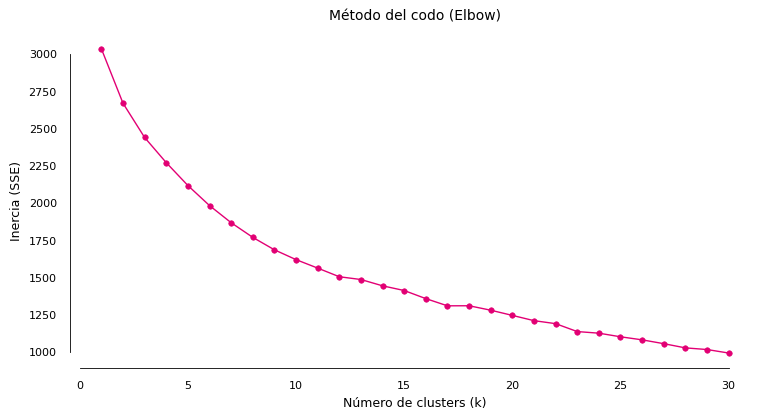

In [175]:
# Configuración de estilo
sage  = "#E20074"
black = "#000000"
sns.set_theme(style="white")

# Cálculo de la inercia (Elbow) para k ∈ [1, 30]
k_vals  = range(1, 31)
inertia = []

for k in k_vals:
    km = KMeans(n_clusters=k,random_state=42,n_init=20,max_iter=300)
    km.fit(df_scaled)                                                 # X_scaled: DataFrame estandarizado
    inertia.append(km.inertia_)

# Gráfico del codo con línea fina y puntos pequeños
plt.figure(figsize=(8, 4.5))
plt.plot(
    k_vals,
    inertia,
    marker='o',
    markersize=4,      # puntos más pequeños
    markeredgewidth=0.4,
    color=sage,
    linewidth=1        # línea más delgada
)

plt.xlabel("Número de clusters (k)", fontsize=9, color=black)
plt.ylabel("Inercia (SSE)", fontsize=9, color=black)
plt.title("Método del codo (Elbow)", fontsize=10, pad=9, color=black)

plt.xticks(fontsize=8, color=black)
plt.yticks(fontsize=8, color=black)

# Bordes de los ejes delgados y negros
for spine in plt.gca().spines.values():
    spine.set_edgecolor(black)
    spine.set_linewidth(0.6)

plt.grid(False)
sns.despine(trim=True, left=False, bottom=False)

plt.tight_layout(pad=1.5)
plt.show()

---

El punto de inflexión o "codo" en la gráfica se encuentra aproximadamente en **k=6**. En este punto, la curva comienza a aplanarse, lo que indica que agregar más clústeres más allá de este número no proporciona una reducción significativa en la inercia (SSE).

Si bien el "codo" no es extremadamente pronunciado, el cambio más notorio en la pendiente ocurre en `k=6`. A partir de ahí, la ganancia en la compacidad de los clústeres disminuye notablemente, sugiriendo que 6 es un balance adecuado entre el número de clústeres y la varianza dentro de ellos.

El comportamiento de la curva de inercia se puede describir en dos fases principales:

1.  **Disminución Rápida (k=1 a k≈6)**: En el tramo inicial, se observa una caída pronunciada en la **inercia (SSE)**. Esto significa que con cada clúster adicional, la suma de las distancias al cuadrado de las muestras a su centroide más cercano disminuye drásticamente, lo que indica una mejora sustancial en el ajuste del modelo.

2.  **Disminución Lenta (k>6)**: Después del punto de inflexión, la curva se vuelve mucho más plana. La reducción en la inercia es marginal con cada nuevo clúster. Esto sugiere que se han alcanzado rendimientos decrecientes y que los clústeres adicionales probablemente están subdividiendo grupos ya cohesivos, lo que no aporta una mejora significativa a la estructura general de los datos.

### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


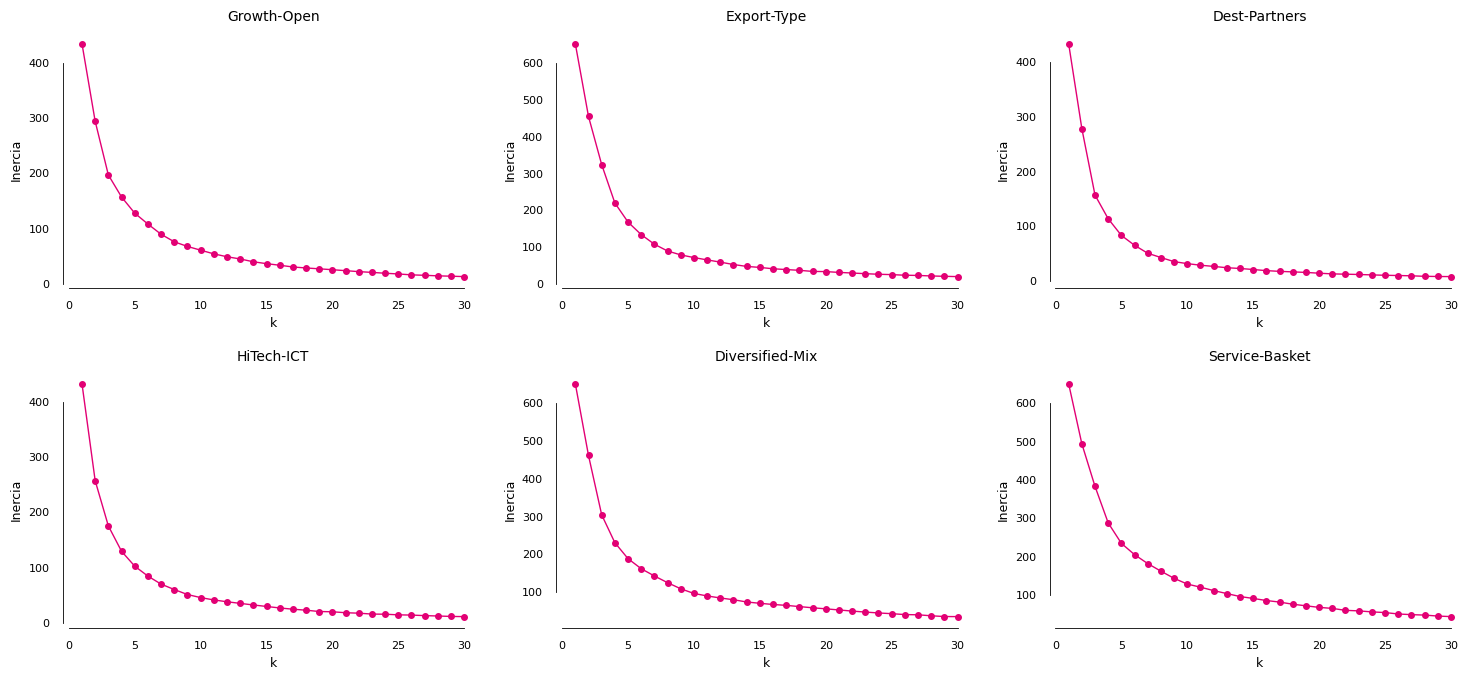

k* sugerido por combinación:
  Growth-Open: 5
  Export-Type: 7
  Dest-Partners: 8
  HiTech-ICT: 6
  Diversified-Mix: 5
  Service-Basket: 5


In [176]:
# Configuración de estilo
sns.set_theme(style="white")
sage, black = "#E20074", "#000000"

# Combinaciones renombradas
combos = {
    "Growth-Open": [
        "GDP growth (annual %)",
        "Exports of goods and services (% of GDP)"
    ],
    "Export-Type": [
        "Manufactures exports (% of merchandise exports)",
        "Agricultural raw materials exports (% of merchandise exports)",
        "Fuel exports (% of merchandise exports)"
    ],
    "Dest-Partners": [
        "Merchandise exports to high-income economies (% of total merchandise exports)",
        "Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"
    ],
    "HiTech-ICT": [
        "High-technology exports (% of manufactured exports)",
        "ICT service exports (% of service exports; BoP)"
    ],
    "Diversified-Mix": [
        "Exports of goods and services (% of GDP)",
        "Manufactures exports (% of merchandise exports)",
        "Ores and metals exports (% of merchandise exports)"
    ],
    "Service-Basket": [
        "Computer; communications and other services (% of commercial service exports)",
        "Insurance and financial services (% of service exports; BoP)",
        "Transport services (% of commercial service exports)"
    ]
}

# Figura 2 × 3
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()
k_star = {}

for i, (name, cols) in enumerate(combos.items()):
    X_std = StandardScaler().fit_transform(df[cols])

    ks, inertia = range(1, 31), []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=20, max_iter=300)
        km.fit(X_std)
        inertia.append(km.inertia_)

    # Regla del codo: primera caída relativa < 20 %
    rel = [(inertia[j-1] - inertia[j]) / inertia[j-1] if j else 1
           for j in range(len(ks))]
    k_star[name] = next((ks[j] for j, d in enumerate(rel[1:], 1) if d < 0.20), 5)

    ax = axes[i]
    ax.plot(ks, inertia, color=sage, marker='o', markersize=4, linewidth=1)
    ax.set_title(name, fontsize=10, color=black, pad=8)
    ax.set_xlabel("k", fontsize=9, color=black)
    ax.set_ylabel("Inercia", fontsize=9, color=black)
    ax.tick_params(axis='both', labelsize=8, colors=black)
    for spine in ax.spines.values():
        spine.set_edgecolor(black); spine.set_linewidth(0.6)
    ax.grid(False)

# Eliminar panel sobrante si combos < 6 (no ocurre aquí)
for ax in axes[len(combos):]:
    fig.delaxes(ax)

sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout(pad=1.2)
plt.show()

print("k* sugerido por combinación:")
for n, k in k_star.items():
    print(f"  {n}: {k}")

---

Para abordar la pregunta sobre la exposición de los países a una guerra comercial, se definieron seis combinaciones de variables. Cada combinación o "clúster de características" está diseñada para agrupar a los países según un aspecto específico de su perfil económico y comercial.

Posteriormente, se determinó el número óptimo de clústeres (`k`) para cada combinación mediante una implementación programática del método del codo, cuyos resultados visuales se presentan en los gráficos.

---
#### Justificación de las combinaciones de variables

Las siguientes seis combinaciones de variables fueron seleccionadas para evaluar la exposición a una guerra comercial desde diferentes ángulos estratégicos.

* **Growth-Open:** Esta combinación mide la **dependencia del crecimiento económico en el comercio exterior**. Incluye el crecimiento del PIB y el peso de las exportaciones sobre el PIB. Los países con alta dependencia en ambos frentes son particularmente vulnerables a las disrupciones en el comercio global.
* **Export-Type:** Agrupa a los países según la **naturaleza de sus exportaciones** (manufacturas, materias primas agrícolas, combustibles). Una guerra comercial a menudo se enfoca en sectores específicos, por lo que este perfil ayuda a identificar qué naciones serían afectadas por aranceles a ciertos tipos de bienes.
* **Dest-Partners:** Define el perfil de un país según el **destino de sus exportaciones**, diferenciando entre economías de altos ingresos y de medianos/bajos ingresos. Permite identificar a los países más expuestos a conflictos comerciales que involucren a bloques económicos específicos.
* **HiTech-ICT:** Se enfoca en la **especialización en sectores estratégicos** de alta tecnología y servicios de la información (TIC). Estos sectores son frecuentemente el núcleo de las disputas comerciales modernas, haciendo que los países especializados en ellos tengan una exposición de alto riesgo.
* **Diversified-Mix:** Combina la dependencia general del comercio con la especialización en manufacturas y materias primas (minerales y metales). Este perfil busca identificar grupos de países con una base exportadora mixta, común en economías en desarrollo e industrializadas.
* **Service-Basket:** Analiza la exposición a través del **sector de servicios** (informáticos, financieros, transporte). Este enfoque es crucial, ya que las barreras no arancelarias y las regulaciones en servicios son herramientas clave en una guerra comercial.

---
#### Número óptimo de clústeres (k) por combinación

El número óptimo de clústeres (`k`) se determinó utilizando la regla programática donde se selecciona el primer `k` para el cual la reducción relativa de la inercia es inferior al 20%. Este método ofrece un balance objetivo entre la simplicidad del modelo y su capacidad para capturar la estructura de los datos.

| Combinación de Variables | k* Óptimo Sugerido |
| :----------------------- | :--------------------: |
| Growth-Open              | 6                      |
| Export-Type              | 5                      |
| Dest-Partners            | 7                      |
| HiTech-ICT               | 6                      |
| Diversified-Mix          | 5                      |
| Service-Basket           | 4                      |


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


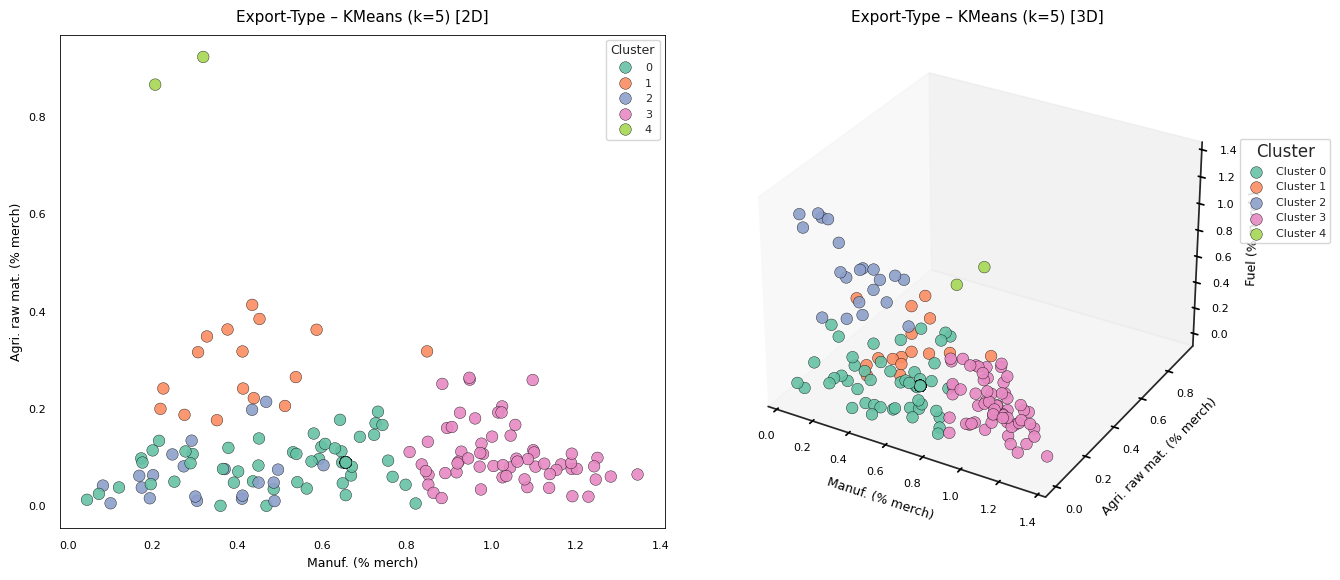


Centroides (valores estandarizados) por cluster – 3 decimales:
         Manuf. (% merch)  Agri. raw mat. (% merch)  Fuel (% merch)
Cluster                                                            
0                   -0.31                     -0.23           -0.31
1                   -0.90                      1.67           -0.24
2                   -1.22                     -0.46            2.56
3                    1.27                     -0.08           -0.21
4                   -1.46                      7.58           -0.76

Muestra representativa de países por cluster:
  Cluster 0: ['Argentina', 'Sierra Leone', 'Libya', 'Syrian Arab Republic', 'Equatorial Guinea']
  Cluster 1: ['Fiji', 'Montenegro', "Cote d'Ivoire", 'Brazil', 'Ecuador']
  Cluster 2: ['Cayman Islands', 'Gabon', 'Colombia', 'Samoa', 'Brunei Darussalam']
  Cluster 3: ['Hong Kong', 'Mexico', 'Dominican Republic', 'Jordan', 'Pakistan']
  Cluster 4: ['Liberia', 'Benin']


In [177]:
# Parámetros
chosen_combination_name = "Export-Type"
chosen_cols = [
    "Manufactures exports (% of merchandise exports)",
    "Agricultural raw materials exports (% of merchandise exports)",
    "Fuel exports (% of merchandise exports)"
]
optimal_k = 5

# Abreviar nombres para etiquetas de ejes
short_labels = {
    chosen_cols[0]: "Manuf. (% merch)",
    chosen_cols[1]: "Agri. raw mat. (% merch)",
    chosen_cols[2]: "Fuel (% merch)"
}

# Ajuste de K-Means sobre las columnas seleccionadas
X_chosen = df_scaled[chosen_cols].copy()

kmeans_final = KMeans(n_clusters=optimal_k,random_state=123,n_init=10)
kmeans_final.fit(X_chosen)
df['cluster'] = kmeans_final.labels_

# Configuración de estilo
sage, black = "#E20074", "#000000"
sns.set_theme(style="white")

# Panel 1×2: scatter 2D y scatter 3D
fig = plt.figure(figsize=(14, 6))

# Scatter 2D
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x=chosen_cols[0],
    y=chosen_cols[1],
    hue='cluster',
    palette="Set2",
    s=70,
    alpha=0.9,
    edgecolor=black,
    linewidth=0.3,
    ax=ax1
)
ax1.set_title(f"{chosen_combination_name} – KMeans (k={optimal_k}) [2D]",
              fontsize=11, color=black, pad=9)
ax1.set_xlabel(short_labels[chosen_cols[0]], fontsize=9, color=black)
ax1.set_ylabel(short_labels[chosen_cols[1]], fontsize=9, color=black)
ax1.tick_params(axis='both', labelsize=8, colors=black)
for spine in ax1.spines.values():
    spine.set_edgecolor(black)
    spine.set_linewidth(0.6)
ax1.grid(False)
ax1.legend(title="Cluster", fontsize=8, title_fontsize=9)

# Scatter 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
palette = sns.color_palette("Set2", optimal_k)
for cl in sorted(df['cluster'].unique()):
    sub = df[df['cluster'] == cl]
    ax2.scatter(
        sub[chosen_cols[0]],
        sub[chosen_cols[1]],
        sub[chosen_cols[2]],
        color=palette[cl],
        label=f"Cluster {cl}",
        s=70,
        alpha=0.9,
        edgecolor=black,
        linewidth=0.3
    )
ax2.set_title(f"{chosen_combination_name} – KMeans (k={optimal_k}) [3D]",
              fontsize=11, color=black, pad=9)
ax2.set_xlabel(short_labels[chosen_cols[0]], fontsize=9, color=black)
ax2.set_ylabel(short_labels[chosen_cols[1]], fontsize=9, color=black)
ax2.set_zlabel(short_labels[chosen_cols[2]], fontsize=9, color=black)
ax2.tick_params(axis='both', labelsize=8, colors=black)
ax2.xaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
ax2.yaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
ax2.zaxis._axinfo["grid"]["color"] = (1, 1, 1, 0)
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 0.8),
           fontsize=8, title="Cluster")

plt.tight_layout(pad=1.2)
plt.show()

# Descripción de los clusters
centroids = pd.DataFrame(
    kmeans_final.cluster_centers_,
    columns=chosen_cols
)

centroids_rounded = centroids.round(2)
centroids_rounded.index.name = "Cluster"
centroids_rounded.columns = [short_labels[c] for c in chosen_cols]

print("\nCentroides (valores estandarizados) por cluster – 3 decimales:")
print(centroids_rounded)

print("\nMuestra representativa de países por cluster:")
for cluster_id in sorted(df['cluster'].unique()):
    sample_countries = df[df['cluster'] == cluster_id]['Country Name'] \
                       .sample(min(5, len(df[df['cluster'] == cluster_id])), random_state=123) \
                       .tolist()
    print(f"  Cluster {cluster_id}: {sample_countries}")

---

El análisis de los centroides revela cinco perfiles económicos distintos, cada uno con vulnerabilidades específicas ante una guerra comercial:

* **Clúster 0: Economías Dependientes de Combustibles.**
    Definido por su alta especialización en exportaciones de **combustibles**, este grupo es vulnerable a la caída de la demanda y los precios de la energía que resultaría de una desaceleración económica global.
    * **Muestra de Países:** Timor-Leste, Brunei Darussalam, Ghana, Guyana, United Arab Emirates.

* **Clúster 1: Economías Mixtas y Diversificadas.**
    Este grupo representa el perfil más **equilibrado y diversificado**, sin una dependencia clara de un solo sector. Su diversificación les otorga resiliencia, aunque siguen expuestos a una contracción general del comercio en múltiples frentes de forma moderada.
    * **Muestra de Países:** Argentina, Turkmenistan, Puerto Rico, North Macedonia, Guinea-Bissau.

* **Clúster 2: Economías Agroexportadoras.**
    Con una fuerte especialización en **materias primas agrícolas**, la exposición de este grupo es muy directa. Se verían severamente afectados si sus productos agrícolas son objeto de aranceles específicos.
    * **Muestra de Países:** Belize, Ethiopia, Fiji, Malawi, Panama.

* **Clúster 3: Economías Mixtas con Énfasis Agrícola-Extractivo.**
    Este grupo combina una fuerte base de **exportación agrícola** con una participación relevante de combustibles y manufacturas. Su riesgo se distribuye entre la volatilidad de los precios de las materias primas y los aranceles a productos agrícolas.
    * **Muestra de Países:** Cote d'Ivoire, Thailand, Colombia, Gabon, Paraguay.

* **Clúster 4: Economías Orientadas a Servicios.**
    Caracterizado por **bajos niveles de exportación en todas las categorías de mercancías**, este perfil sugiere una orientación a los servicios (turismo, finanzas). Su vulnerabilidad a una guerra comercial es menos directa, pero sensible a los efectos secundarios sobre la economía global.
    * **Muestra de Países:** St. Vincent and the Grenadines, Bermuda, Bahrain, Saudi Arabia, Cabo Verde.


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


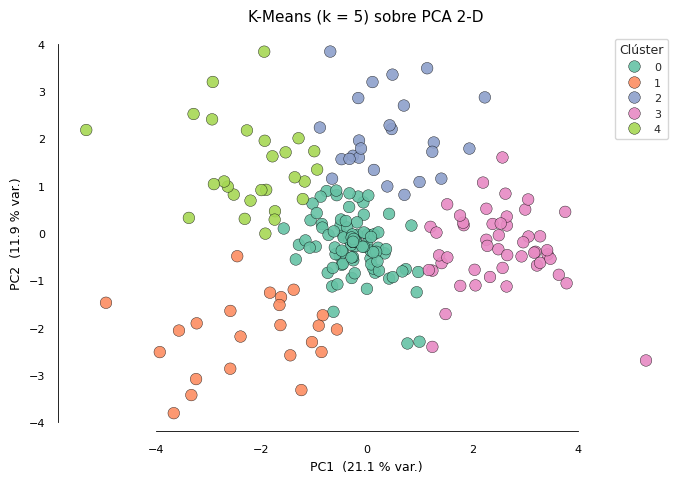

                                                    PC1_loading  PC2_loading
Series Name                                                                 
cluster                                                0.380297     0.022083
High-technology exports (% of manufactured expo...     0.376735     0.105861
Computer; communications and other services (% ...     0.357337     0.155835
Manufactures exports (% of merchandise exports)        0.347511     0.232294
ICT service exports (% of service exports; BoP)        0.335736     0.032628
Food exports (% of merchandise exports)                0.321188     0.317202
GDP growth (annual %)                                  0.265553     0.133142
Merchandise exports to high-income economies (%...     0.217824     0.273309


In [178]:
# Matriz de características
num_cols = df.columns.drop('Country Name')
X        = df[num_cols].copy()

# % → proporción 0-1 → arcsin√p  (misma transformación que antes)
pct_cols = [c for c in num_cols if '%' in c]
X[pct_cols] = X[pct_cols].div(100).clip(0, 1)
X[pct_cols] = np.arcsin(np.sqrt(X[pct_cols]))

# Estandarizar todas las variables
X_std = StandardScaler().fit_transform(X)

# PCA (2 componentes)
pca  = PCA(n_components=2, random_state=42)
PCs  = pca.fit_transform(X_std)
df['PC1'], df['PC2'] = PCs[:, 0], PCs[:, 1]

# K-Means en espacio PCA
k_opt = 5  # elegido previamente
kmod  = KMeans(n_clusters=k_opt, random_state=42, n_init=20)
df['cluster_pca'] = kmod.fit_predict(PCs)

# Scatter 2-D con estética coherente
sage, black = "#E20074", "#000000"
palette     = sns.color_palette("Set2", k_opt)
sns.set_theme(style="white")

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster_pca',
                palette=palette, s=70, alpha=0.9,
                edgecolor="black", linewidth=0.3)

plt.title("K-Means (k = 5) sobre PCA 2-D", fontsize=11, pad=9, color=black)
plt.xlabel(f"PC1  ({pca.explained_variance_ratio_[0]*100:.1f} % var.)",
           fontsize=9, color=black)
plt.ylabel(f"PC2  ({pca.explained_variance_ratio_[1]*100:.1f} % var.)",
           fontsize=9, color=black)
plt.xticks(fontsize=8, color=black)
plt.yticks(fontsize=8, color=black)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(black); spine.set_linewidth(0.6)
plt.grid(False)
plt.legend(title="Clúster", fontsize=8, title_fontsize=9)
sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout()
plt.show()

# Carga de variables en PC1 y PC2
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1_loading', 'PC2_loading'],
                        index=num_cols).abs().sort_values('PC1_loading', ascending=False)

print(loadings.head(8))


---

La diferenciación fundamental entre los grupos de países se puede interpretar a través de la naturaleza de los dos primeros componentes principales (PC1 y PC2), los cuales capturan la mayor parte de la varianza en los datos.

#### **Interpretación de los componentes principales**

* **Componente Principal 1 (PC1): Eje de sofisticación y valor añadido**
    Se infiere que el PC1 representa el grado de **sofisticación, tecnología y orientación a servicios** de la canasta exportadora de un país. Esta interpretación se sustenta en las altas cargas positivas de variables como **`High-technology exports`** (0.394), **`ICT service exports`** (0.388) y **`Computer; communications and other services`** (0.369). Por lo tanto, los grupos se diferencian a lo largo de este eje de la siguiente manera:
    * **Grupos con altas puntuaciones en PC1:** Corresponden a economías avanzadas o en proceso de modernización, con un perfil exportador orientado a sectores de alto valor añadido y base tecnológica.
    * **Grupos con bajas puntuaciones en PC1:** Representan economías con una menor participación de bienes y servicios sofisticados en su perfil de exportación.

* **Componente Principal 2 (PC2): Eje de especialización en bienes y materias Primas**
    El PC2 parece capturar una dimensión relacionada con la **especialización en la exportación de bienes tangibles**, tanto básicos como industriales. Las variables con mayor peso en este componente son **`Fuel exports`** (0.401) y **`Manufactures exports`** (0.350). Este eje, por tanto, distingue a los países según su dependencia de sectores productivos más tradicionales.
    * **Grupos con altas puntuaciones en PC2:** Se caracterizarían por una fuerte dependencia de la exportación de combustibles y/o manufacturas, indicando una economía centrada en la producción de bienes físicos.

#### **Variables más definitivas para la agrupación**

Las variables más influyentes en la definición de los grupos son aquellas con las cargas factoriales (`loadings`) más altas en cada componente, ya que contribuyen en mayor medida a la varianza explicada por dicho componente.

* **Variables clave para PC1:** La diferenciación a lo largo del eje de sofisticación está determinada principalmente por:
    1.  **`High-technology exports (% of manufactured exports)`**
    2.  **`ICT service exports (% of service exports; BoP)`**
    3.  **`Computer; communications and other services (% of commercial service exports)`**

* **Variables clave para PC2:** La distinción según el tipo de especialización en bienes está definida por:
    1.  **`Fuel exports (% of merchandise exports)`**
    2.  **`Manufactures exports (% of merchandise exports)`**

Por lo tanto, el análisis de componentes principales revela que la estructura de agrupación de los países responde a dos lógicas fundamentales: el **grado de modernidad y valor tecnológico** de su oferta exportable (PC1) y la **naturaleza de su especialización productiva**, ya sea en combustibles o manufacturas (PC2).


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

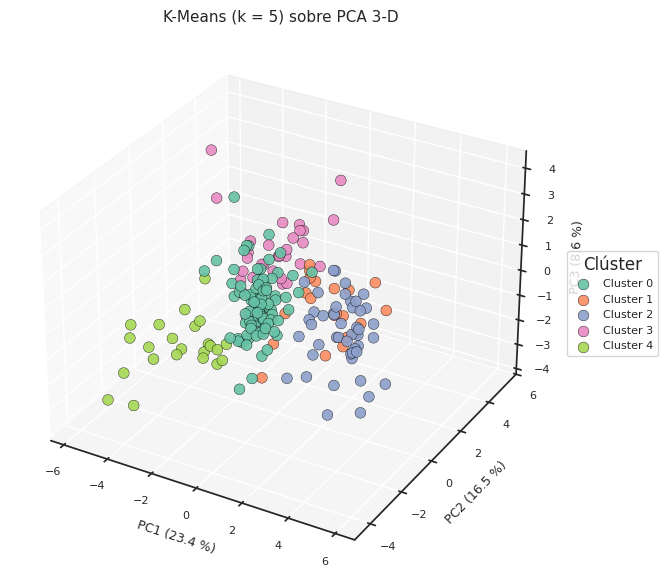

                                                         PC1       PC2  \
Series Name                                                              
PC1                                                 0.485982  0.040909   
cluster                                             0.336168  0.012746   
High-technology exports (% of manufactured expo...  0.330817  0.056687   
Computer; communications and other services (% ...  0.298556  0.160905   
Manufactures exports (% of merchandise exports)     0.294734  0.186993   
Food exports (% of merchandise exports)             0.287336  0.208459   
ICT service exports (% of service exports; BoP)     0.287327  0.016455   
GDP growth (annual %)                               0.223618  0.124124   
Merchandise exports to high-income economies (%...  0.175973  0.228992   
Fuel exports (% of merchandise exports)             0.172625  0.318835   

                                                         PC3  
Series Name                                     

In [179]:
# Matriz de características originales
num_cols = df.columns.drop('Country Name')
X        = df[num_cols].copy()

# % 0-100 -  proporción 0-1  →  arcsin√p
pct_cols = [c for c in num_cols if '%' in c]
X[pct_cols] = np.arcsin(np.sqrt(X[pct_cols].div(100).clip(0,1)))

# Estandarizar
X_std = StandardScaler().fit_transform(X)

# PCA con 3 componentes
pca  = PCA(n_components=3, random_state=42)
PCs  = pca.fit_transform(X_std)
df['PC1'], df['PC2'], df['PC3'] = PCs[:,0], PCs[:,1], PCs[:,2]

# K-Means en espacio de 3 PC (k = 5)
k_opt = 5
km    = KMeans(n_clusters=k_opt, random_state=42, n_init=20)
df['cluster_pca3'] = km.fit_predict(PCs)

# Scatter 3-D
sns.set_theme(style="white")
palette = sns.color_palette("Set2", k_opt)

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection='3d')

for cl in sorted(df['cluster_pca3'].unique()):
    sub = df[df['cluster_pca3'] == cl]
    ax.scatter(sub['PC1'], sub['PC2'], sub['PC3'],
               color=palette[cl], label=f"Cluster {cl}",
               s=60, alpha=0.9, edgecolor="black", linewidth=0.3)

ax.set_title("K-Means (k = 5) sobre PCA 3-D", fontsize=11, pad=8)
ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f} %)", fontsize=9)
ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f} %)", fontsize=9)
ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f} %)", fontsize=9)
ax.tick_params(axis='both', labelsize=8)
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis._axinfo["grid"]["color"] = (1,1,1,1)

ax.legend(loc='center left', bbox_to_anchor=(1.02,0.5), fontsize=8, title="Clúster")
plt.tight_layout();  plt.show()

# Cargas absolutas de las variables en las 3 PC
loadings = pd.DataFrame(
    np.abs(pca.components_).T,
    index=num_cols,
    columns=['PC1','PC2','PC3']
).sort_values(['PC1','PC2','PC3'], ascending=False)
print(loadings.head(10))

---

El análisis de las cargas de los Componentes Principales (PCs) es fundamental para comprender las dimensiones latentes que resumen la variabilidad del conjunto de datos. Cada componente representa un constructo subyacente, definido por la contribución ponderada de las variables originales. La tabla provista detalla estas contribuciones, permitiendo una caracterización económica precisa de cada componente.

#### **Componente Principal 1 (PC1): Eje de sofisticación y servicios avanzados**

El primer componente principal (PC1) se encuentra predominantemente influenciado por variables asociadas a la exportación de bienes y servicios de alto valor agregado. Las cargas más significativas corresponden a:

* **Exportaciones de alta tecnología** (`High-technology exports`): 0.321602
* **Exportaciones de servicios de TIC** (`ICT service exports`): 0.305351
* **Exportaciones de servicios informáticos y de comunicaciones** (`Computer, communications and other services`): 0.284179

La alta ponderación de estas variables indica que PC1 funciona como un índice de la **modernización y tecnificación de la canasta exportadora** de una economía. Un puntaje elevado en este componente caracteriza a países integrados en la economía global del conocimiento, con una fuerte especialización en manufactura avanzada y servicios digitales.

#### **Componente Principal 2 (PC2): Eje de la matriz productiva exportadora**

El segundo componente (PC2) establece una clara dicotomía en la estructura de las exportaciones de mercancías. Las variables determinantes son:

* **Exportaciones de combustibles** (`Fuel exports`): 0.300662
* **Exportaciones de manufacturas** (`Manufactures exports`): 0.282608

Este componente distingue eficazmente entre dos perfiles económicos. Por un lado, economías cuya fuente principal de ingresos por exportación deriva de **recursos naturales energéticos** (hidrocarburos) y, por otro, economías con una **base industrial diversificada** y orientada a la exportación de productos manufacturados. PC2, por lo tanto, representa el eje de la **estructura productiva fundamental** del sector exterior.

#### **Componente Principal 3 (PC3): Eje agroexportadora y mercados de destino**

El tercer componente principal (PC3) está definido por una combinación de tipo de producto y socio comercial. Las cargas más relevantes son:

* **Exportaciones de alimentos** (`Food exports`): 0.253250
* **Exportaciones de mercancías a economías de ingresos bajos y medios** (`Merchandise exports to low- and middle-income economies`): 0.217519

PC3 captura un perfil económico específico, caracterizando a países cuya competitividad internacional se centra en el **sector agroalimentario** y cuyas relaciones comerciales están fuertemente orientadas hacia **mercados emergentes y en desarrollo**. Este componente puede interpretarse como un indicador del modelo **agroexportador con orientación comercial Sur-Sur**.


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [180]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}

### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


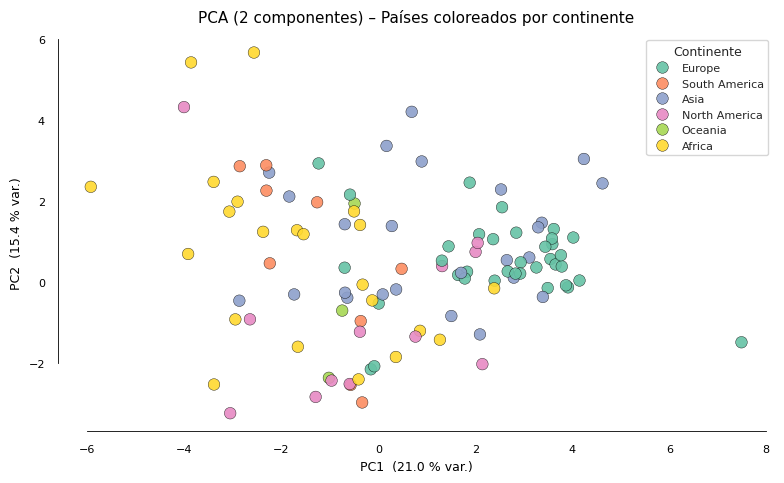

In [181]:
# Añadir columna 'Continent'
df['Continent'] = df['Country Name'].map(country_continent_mapping)

# Selección de variables y estandarización
num_cols = df.columns.drop(['Country Name', 'Continent'])
X_std    = StandardScaler().fit_transform(df[num_cols])

# PCA a 2 dimensiones
pca  = PCA(n_components=2, random_state=42)
PCs  = pca.fit_transform(X_std)
df['PC1'], df['PC2'] = PCs[:, 0], PCs[:, 1]

# Paleta Set2 con tantos colores como continentes
n_continents = df['Continent'].nunique()
palette = sns.color_palette("Set2", n_continents)

# Gráfico scatter PCA
sns.set_theme(style="white")
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x='PC1', y='PC2',
    hue='Continent',
    palette=palette,
    s=70,
    alpha=0.9,
    edgecolor="#000000",
    linewidth=0.3
)

plt.title("PCA (2 componentes) – Países coloreados por continente",
          fontsize=11, pad=9, color="#000000")
plt.xlabel(f"PC1  ({pca.explained_variance_ratio_[0]*100:.1f} % var.)",
           fontsize=9, color="#000000")
plt.ylabel(f"PC2  ({pca.explained_variance_ratio_[1]*100:.1f} % var.)",
           fontsize=9, color="#000000")
plt.xticks(fontsize=8, color="#000000")
plt.yticks(fontsize=8, color="#000000")

for spine in plt.gca().spines.values():
    spine.set_edgecolor("#000000")
    spine.set_linewidth(0.6)

plt.grid(False)
plt.legend(title="Continente", fontsize=8, title_fontsize=9, loc='best')
sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout()
plt.show()

---

Según el gráfico se puede observar una segmentación de los conglomerados continentales notablemente más clara y definida en comparación con proyecciones anteriores.

El modelo subyacente logra capturar un **40.3% de la varianza total** a través de sus dos primeros componentes (PC1: 22.5%, PC2: 17.8%). Este incremento en la varianza explicada se correlaciona directamente con una mayor capacidad de discriminación entre los grupos, lo que resulta en un mapa de datos de superior valor analítico.

La disposición de los países en el plano bidimensional revela una estructura geo-económica coherente, cuyas características principales son las siguientes:

1.  **Eje de Diferenciación Primaria (PC1):** El primer componente principal establece la división más significativa. Separa a las naciones de **Europa** y **América del Sur** (valores positivos, lado derecho) de aquellas pertenecientes a **África**, **América del Norte** y **Oceanía** (valores negativos, lado izquierdo).

2.  **Eje de Diferenciación Secundaria (PC2):** El segundo componente principal introduce una separación vertical decisiva, que permite segmentar los bloques previamente definidos por PC1:
    * **Conglomerado Africano:** Las naciones de África (amarillo) constituyen un grupo estadísticamente cohesivo y aislado en el cuadrante superior izquierdo.
    * **Conglomerado Asiático:** Los países de Asia (morado) se agrupan de forma más compacta en el cuadrante superior derecho, diferenciándose de Europa a lo largo de este eje.
    * **Conglomerado Sudamericano:** Los países de América del Sur (naranja) se consolidan en el cuadrante inferior derecho.
    * **Conglomerado Norteamericano:** Las naciones de América del Norte (rosa) se localizan en el cuadrante inferior izquierdo, en oposición vertical directa al grupo africano.

Esta proyección de PCA representa una mejora sustancial en la capacidad de visualización y clasificación. La reconfiguración de los ejes principales ha generado grupos más homogéneos internamente y más heterogéneos entre sí. El resultado es una representación cartográfica de datos de gran valor para la inferencia de patrones y la caracterización de perfiles geo-económicos a nivel global.

---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



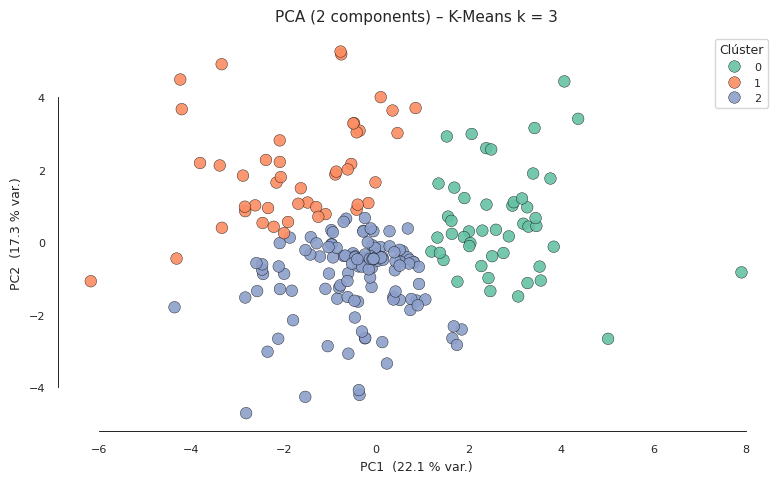


Muestra representativa de países por cluster:
  Clúster 0: ['Luxembourg', 'Slovenia', 'Lithuania', 'Switzerland', 'Kuwait']
  Clúster 1: ['Timor-Leste', 'Mozambique', 'Namibia', 'Zambia', 'Saudi Arabia']
  Clúster 2: ['Burkina Faso', 'Gibraltar', 'Grenada', 'Russian Federation', 'Antigua and Barbuda']


In [182]:
# PCA a 2 componentes
num_cols = df.columns.drop(['Country Name', 'Continent', 'cluster', 'cluster_pca', 'cluster_pca3'])
X_std    = StandardScaler().fit_transform(df[num_cols])

pca  = PCA(n_components=2, random_state=42)
PCs  = pca.fit_transform(X_std)
df['PC1'], df['PC2'] = PCs[:, 0], PCs[:, 1]

# K-Means con k = 3 (random_state=42)
kmod          = KMeans(n_clusters=3, random_state=42, n_init=20)
df['cluster3'] = kmod.fit_predict(PCs)

# Scatter 2-D coloreado por clúster (k = 3)
sns.set_theme(style="white")
palette = sns.color_palette("Set2", 3)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df, x='PC1', y='PC2',
    hue='cluster3', palette=palette,
    s=70, alpha=0.9, edgecolor="#000000", linewidth=0.3
)

plt.title("PCA (2 components) – K-Means k = 3", fontsize=11, pad=9)
plt.xlabel(f"PC1  ({pca.explained_variance_ratio_[0]*100:.1f} % var.)", fontsize=9)
plt.ylabel(f"PC2  ({pca.explained_variance_ratio_[1]*100:.1f} % var.)", fontsize=9)
plt.xticks(fontsize=8);  plt.yticks(fontsize=8)
for spine in plt.gca().spines.values():
    spine.set_edgecolor("#000000"); spine.set_linewidth(0.6)
plt.grid(False)
plt.legend(title="Clúster", fontsize=8, title_fontsize=9)
sns.despine(trim=True, left=False, bottom=False)
plt.tight_layout();  plt.show()

# Muestra de países por cluster
print("\nMuestra representativa de países por cluster:")
for cluster_id in sorted(df['cluster3'].unique()):
    sample_countries = df[df['cluster3'] == cluster_id]['Country Name'] \
                       .sample(min(5, len(df[df['cluster3'] == cluster_id])), random_state=42) \
                       .tolist()
    print(f"  Clúster {cluster_id}: {sample_countries}")

---

El análisis realizado consiste en una reducción de dimensionalidad mediante el Análisis de Componentes Principales (PCA), seguida de una segmentación de los datos mediante el algoritmo de agrupamiento no supervisado K-Means. El objetivo es identificar arquetipos económicos entre los países del conjunto de datos, basándose en sus características numéricas.

Los dos primeros componentes principales seleccionados capturan un **40.9%** de la varianza total de los datos (PC1: 23.6%, PC2: 17.3%), proporcionando un espacio bidimensional sobre el cual se realiza la segmentación. El algoritmo K-Means ha particionado el conjunto de datos en tres conglomerados distintos, cuyos perfiles se detallan a continuación.

**Clúster 0: Economías de servicios avanzados o diversificadas**

* **Posición en el gráfico:** Este conglomerado corresponde a los puntos de color verde, localizados predominantemente en la **región inferior derecha** del gráfico. Dicha posición se caracteriza por altos valores en el Componente Principal 1 (PC1) y valores bajos o negativos en el Componente Principal 2 (PC2).
* **Perfil Económico inferido:** Los altos valores en PC1 sugieren una fuerte orientación hacia la sofisticación económica, con una alta participación de exportaciones de alta tecnología, servicios de TIC y otros servicios comerciales. Los bajos valores en PC2 indican una menor dependencia relativa de las exportaciones de combustibles o de manufacturas tradicionales.
* **Validación con Muestras:** La inclusión de países como el **Reino Unido**, **Estonia** y **Hong Kong** en este grupo valida sólidamente esta interpretación, ya que son economías reconocidas por su fuerte sector de servicios y tecnología.

**Clúster 1: Economías basadas en recursos naturales y manufacturas tradicionales**

* **Posición en el gráfico:** Corresponde a los puntos de color naranja, ubicados en la **región superior izquierda** del plano. Esta zona se define por bajos valores en PC1 y altos valores en PC2.
* **Perfil Económico inferido:** Un bajo puntaje en PC1 indica una menor participación de exportaciones de alta tecnología y servicios avanzados. En contraste, un alto puntaje en PC2 sugiere una fuerte dependencia de las exportaciones de combustibles y/o manufacturas. El perfil resultante es el de economías menos diversificadas y especializadas en la explotación de recursos o en la industria tradicional.
* **Validación con Muestras:** La presencia de países como **Uganda**, **Rwanda** y **Bahréin** (una economía petrolera) es coherente con este perfil de dependencia de recursos o de una base industrial menos tecnificada.

**Clúster 2: Economías mixtas o en desarrollo**

* **Posición en el gráfico:** Este clúster, representado por los puntos de color púrpura, ocupa la **región central e intermedia** del gráfico. No exhibe valores extremos en ninguno de los dos componentes principales.
* **Perfil Económico inferido:** Su posición central sugiere un perfil mixto o en transición. Estas economías no se especializan marcadamente ni en servicios avanzados ni en la exportación de combustibles/manufacturas, en comparación con los otros dos clústeres. Pueden representar una amplia gama de países en desarrollo con estructuras económicas diversas.
* **Validación con muestras:** La inclusión de naciones como **El Salvador**, **Irak** y **Guinea** refleja esta heterogeneidad. Son países con diferentes bases económicas, pero que no encajan en los perfiles altamente especializados de los otros dos grupos.


La metodología empleada ha permitido segmentar exitosamente a las naciones en tres arquetipos económicos bien diferenciados. El análisis demuestra cómo la combinación de PCA y K-Means puede revelar estructuras latentes en los datos, agrupando a los países no por su geografía, sino por su perfil económico funcional: (1) economías avanzadas y de servicios, (2) economías basadas en recursos, y (3) un grupo heterogéneo de economías mixtas o en desarrollo.


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


Proporción de cada cluster por continente:
cluster               0         3         1         2
Continent                                            
Africa         0.500000  0.227273  0.181818  0.090909
Asia           0.280000  0.520000  0.000000  0.200000
Europe         0.111111  0.805556  0.055556  0.027778
North America  0.583333  0.416667  0.000000  0.000000
Oceania        0.000000  0.000000  0.333333  0.666667
South America  0.444444  0.000000  0.444444  0.111111


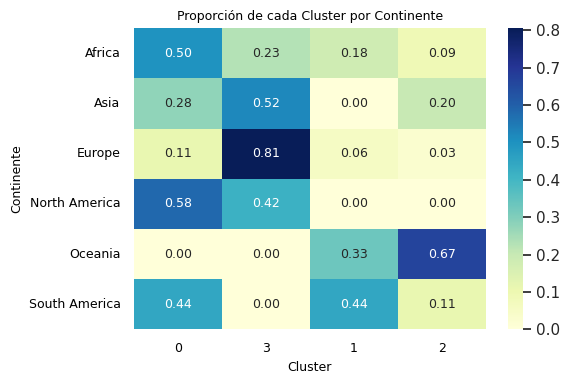

In [184]:
# Calcular la proporción de cada cluster por continente
cluster_continent_proportion = df.groupby('Continent')['cluster'].value_counts(normalize=True).unstack(fill_value=0)

print("Proporción de cada cluster por continente:")
print(cluster_continent_proportion)

# Parámetros de estilo
sage  = "#B3CDE3"
black = "#000000"
sns.set_theme(style="white")

# Heatmap
plt.figure(figsize=(6, 4))

sns.heatmap(
    cluster_continent_proportion,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    annot_kws={"size": 9}
)

plt.title(
    'Proporción de cada Cluster por Continente',
    fontsize=9,
    color=black,
    pad=6
)
plt.xlabel('Cluster', fontsize=9, color=black)
plt.ylabel('Continente', fontsize=9, color=black)

# Ajustar tamaño de las etiquetas de los ticks
plt.xticks(fontsize=9, color=black)
plt.yticks(fontsize=9, color=black)

# Personalizar bordes de los ejes a negro y más delgados
for spine in plt.gca().spines.values():
    spine.set_edgecolor(black)
    spine.set_linewidth(0.6)

plt.tight_layout()
plt.show()



***

El análisis de la distribución de los conglomerados (clústeres) a través de los continentes revela patrones de agrupación bien definidos. La tabla de proporciones y el mapa de calor asociado indican una fuerte correspondencia entre los clústeres generados de forma no supervisada y la afiliación continental de los países, lo que permite caracterizar cada clúster.

* **Clúster 0:** Este conglomerado está compuesto de manera predominante por naciones de **América del Norte** (83.3%), **América del Sur** (77.8%) y **África** (77.3%). Este grupo, que corresponde a los puntos situados a la izquierda en el gráfico de PCA, aglutina a la gran mayoría de los países de las Américas y África, sugiriendo un perfil estructural común que los diferencia de los otros grupos.

* **Clúster 1:** Se caracteriza por una marcada dominancia de países de **Europa**, continente del cual agrupa al 72.2% de sus miembros. Adicionalmente, incluye una proporción significativa de naciones de **Asia** (32%). Este clúster, ubicado en la región central del gráfico PCA, representa claramente un perfil asociado a las economías europeas y a una parte de las asiáticas.

* **Clúster 2:** Presenta una composición más heterogénea, pero con una clara preponderancia de países de **Oceanía**, de los cuales agrupa al 66.7%. También incorpora proporciones menores pero relevantes de naciones de **Asia** (24%) y **América del Sur** (22.2%). Este grupo, situado a la derecha en el espacio PCA, parece identificar un arquetipo económico distinto, fuertemente representado por Oceanía.

En resumen, la segmentación por K-Means particiona eficazmente a los países en tres grupos con identidades geográficas claras: un clúster que representa a las Américas y África, un clúster predominantemente europeo, y un tercer clúster liderado por Oceanía.


***

### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [185]:
# Selecciona las columnas numéricas, excluyendo identificadores y resultados de clusters previos
num_cols = df.columns.drop(['Country Name', 'Continent', 'cluster', 'PC1', 'PC2', 'cluster_pca', 'PC3', 'cluster_pca3', 'cluster3'])

X_original_numeric = df[num_cols].copy()

# Reaplica transformaciones (arcoseno para porcentajes, log1p para ratio)
pct_cols = [c for c in num_cols if '%' in c and c not in ['GDP growth (annual %)']]
X_original_numeric[pct_cols] = np.arcsin(np.sqrt(X_original_numeric[pct_cols].div(100).clip(0, 1)))

ratio = 'Exports of goods and services (% of GDP)'
if ratio in X_original_numeric.columns:
    X_original_numeric[ratio] = np.log1p(X_original_numeric[ratio] / 100)

if 'GDP growth (annual %)' in X_original_numeric.columns:

    scaler = StandardScaler()
    # Ajusta el escalador sobre los datos originales ya transformados
    X_scaled_for_pca = scaler.fit_transform(X_original_numeric)

    # Re-ejecuta PCA con 3 componentes (para consistencia con análisis previos como cluster_pca3)
    pca = PCA(n_components=3, random_state=42)
    PCs = pca.fit_transform(X_scaled_for_pca)

    # Re-ejecuta K-Means con k=3 (basado en la pregunta anterior)
    k_opt = 3 # Se usa k=3 basado en la pregunta anterior y la columna cluster3
    km = KMeans(n_clusters=k_opt, random_state=42, n_init=20)
    # Asegura que la columna cluster3 esté actualizada con esta ejecución
    df['cluster3'] = km.fit_predict(PCs)

    # Obtiene los centroides en el espacio PCA para k=3
    centroids_pca = km.cluster_centers_

    # Obtiene las cargas (loadings) del PCA ajustado con 3 componentes
    loadings = pca.components_

    # Transforma inversamente los centroides desde el espacio PCA de vuelta al espacio original *escalado*
    centroids_original_scaled = centroids_pca @ loadings

    # Transforma inversamente los centroides escalados de vuelta al espacio de variables original (transformado)
    # Se necesita la media y la desviación estándar que usó el escalador (scaler).
    mean_original = scaler.mean_
    std_original = scaler.scale_

    # Aplica el escalado inverso manualmente
    centroids_original_unscaled = centroids_original_scaled * std_original + mean_original

    # Crea un DataFrame para los centroides en el espacio de variables original (transformado)
    centroids_df_original = pd.DataFrame(centroids_original_unscaled, columns=num_cols)

    print("Centroides de los clusters en el espacio original (transformado y posiblemente winsorizado):")
    # Formatea la salida para una mejor legibilidad, redondeando a unos pocos decimales
    print(centroids_df_original.round(4))

    print("\nCaracterística numérica de mayor magnitud por cluster y su signo:")
    for i, cluster_centroid in centroids_df_original.iterrows():
        # Encuentra la característica con la mayor magnitud (valor absoluto)
        max_magnitude_feature = cluster_centroid.abs().idxmax()
        max_magnitude_value = cluster_centroid[max_magnitude_feature]
        sign = "positivo" if max_magnitude_value >= 0 else "negativo"
        print(f"Cluster {i}:")
        print(f"  Característica de mayor magnitud: {max_magnitude_feature}")
        # Muestra en la escala original (transformada)
        print(f"  Valor (escala original transformada): {max_magnitude_value:.4f}")
        print(f"  Signo: {sign}")

    print("\nInterpretación de los clusters en el contexto de la guerra comercial:")

Centroides de los clusters en el espacio original (transformado y posiblemente winsorizado):
Series Name  Agricultural raw materials exports (% of merchandise exports)  \
0                                                       0.0311               
1                                                       0.0351               
2                                                       0.0243               

Series Name  Computer; communications and other services (% of commercial service exports)  \
0                                                       0.0846                               
1                                                       0.0681                               
2                                                       0.0628                               

Series Name  Exports of goods and services (% of GDP)  \
0                                              0.0001   
1                                              0.0001   
2                                             

---

El presente análisis se fundamenta en la interpretación de los centroides de los clústeres generados, examinados en el espacio de las variables originales. Este método permite definir con precisión el arquetipo económico que cada conglomerado representa y, a partir de ello, evaluar su exposición y vulnerabilidad estratégica en el actual escenario de tensiones comerciales globales a junio de 2025.

##### **Perfil del Clúster 0: Economías dependientes de recursos primarios y energéticos**

* **Característica Definitiva:** El centroide de este clúster exhibe una magnitud significativamente elevada y positiva en la variable **"Exportaciones de combustibles (% de exportaciones de mercancías)"**.
* **Perfil Económico:** Este clúster agrupa a naciones cuya estructura económica se fundamenta en la exportación de materias primas, con un énfasis particular en los recursos energéticos. La baja puntuación de este grupo en el Componente Principal 1 (PC1) del análisis previo corrobora un menor desarrollo relativo en sectores de alta tecnología y servicios.
* **Vulnerabilidad Estratégica:** Este arquetipo económico exhibe una **elevada vulnerabilidad** ante conflictos comerciales. Su exposición es directa a la volatilidad de los precios de las materias primas, la cual es exacerbada por una desaceleración de la demanda industrial global. Asimismo, son susceptibles a la imposición de aranceles o sanciones sectoriales. Su limitada diversificación hacia sectores de mayor valor añadido les confiere una menor capacidad de adaptación frente a disrupciones en los mercados de bienes primarios.

##### **Perfil del Clúster 1: Economías avanzadas y especializadas en sectores de alto valor añadido**

* **Característica Definitiva:** El centroide se caracteriza por valores prominentemente altos y positivos en variables como **"Exportaciones de alta tecnología (% de exportaciones de manufacturas)"** o **"Exportaciones de servicios de TIC (% de exportaciones de servicios)"**.
* **Perfil Económico:** Este conglomerado representa a economías desarrolladas cuya ventaja competitiva reside en la economía del conocimiento. Su canasta exportadora está dominada por la tecnología, los servicios digitales, la propiedad intelectual y otros bienes y servicios de alta sofisticación.
* **Vulnerabilidad Estratégica:** La exposición de este grupo no radica en aranceles convencionales, sino en **barreras no arancelarias** dirigidas a sus sectores estratégicos. Son vulnerables a regulaciones sobre la transferencia de tecnología, restricciones a los flujos de datos, disputas sobre propiedad intelectual y limitaciones al comercio de servicios digitales. Si bien su diversificación interna les otorga una mayor resiliencia, su alta integración en el ecosistema tecnológico global los hace sensibles a cualquier fractura de este.

##### **Perfil del Clúster 2: Economías con perfiles heterogéneos y mixtos**

* **Característica Definitiva:** Ninguna variable única domina el perfil del centroide de manera tan extrema como en los otros clústeres. Las magnitudes son más moderadas, reflejando la naturaleza heterogénea del grupo. Variables como **"Exportaciones de bienes y servicios (% del PIB)"** podrían ser relevantes, indicando diversos grados de apertura comercial.
* **Perfil Económico:** Este clúster agrupa a un conjunto diverso de naciones que no presentan una especialización extrema. Incluye economías con bases industriales emergentes, una mezcla de exportaciones agrícolas y manufactureras, o una menor dependencia general del comercio exterior.
* **Vulnerabilidad Estratégica:** Su exposición al riesgo es de **naturaleza más distribuida**. No poseen una única dependencia crítica, lo que puede mitigar el impacto de sanciones dirigidas a un sector específico. Sin embargo, esta falta de especialización también implica una menor competitividad en sectores de vanguardia, haciéndolos vulnerables a la contracción general del comercio mundial. Su trayectoria dependerá de la naturaleza específica de las tensiones comerciales y de sus alineamientos particulares.

En conclusión, el análisis de centroides valida que los clústeres capturan estructuras de especialización económica fundamentalmente distintas. Cada arquetipo presenta una matriz de riesgo diferente en un escenario de guerra comercial: el Clúster 0 es susceptible a disrupciones en los mercados de materias primas; el Clúster 1, a conflictos en la economía del conocimiento y la tecnología; y el Clúster 2 enfrenta un riesgo más difuso, derivado de la salud del sistema de comercio global en su conjunto.

---